In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import category_encoders as ce
import os
import pickle
import gc
from tqdm import tqdm
import re

Using TensorFlow backend.


In [2]:
def encode_text_features(encode_decode, data_frame, encoder_isa=None, encoder_mem_type=None):
    # Implement Categorical OneHot encoding for ISA and mem-type
    if encode_decode == 'encode':
        encoder_isa = ce.one_hot.OneHotEncoder(cols=['isa'])
        encoder_mem_type = ce.one_hot.OneHotEncoder(cols=['mem-type'])
        encoder_isa.fit(data_frame, verbose=1)
        df_new1 = encoder_isa.transform(data_frame)
        encoder_mem_type.fit(df_new1, verbose=1)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
    else:
        df_new1 = encoder_isa.transform(data_frame)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
        
    return encoded_data_frame, encoder_isa, encoder_mem_type

In [3]:
df = pd.read_csv('C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Performance_Dataset\\Performance\\PhysicalSystems\\runtimes_final_npb_ep.csv')

In [4]:
df.head()

,sys,sysname,arch,cpu-clock,isa,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,...,l3_size,mem-size,mem-type,mem_clock,num-cpus,bus_speed,PS,executable,no_of_procs,runtime
0,akm_desktop,Dell_Optiplex_3040,IntelCorei56500_DDR31600_4GB,3.2,X86_64,8,64,1,32,4,...,6144,4,DDR3,1600,4,4096.0,B,npb_ep.B.x_1,1,58.08
1,akm_desktop,Dell_Optiplex_3040,IntelCorei56500_DDR31600_4GB,3.2,X86_64,8,64,1,32,4,...,6144,4,DDR3,1600,4,4096.0,B,npb_ep.B.x_2,2,29.84
2,akm_desktop,Dell_Optiplex_3040,IntelCorei56500_DDR31600_4GB,3.2,X86_64,8,64,1,32,4,...,6144,4,DDR3,1600,4,4096.0,B,npb_ep.B.x_3,3,20.54
3,akm_desktop,Dell_Optiplex_3040,IntelCorei56500_DDR31600_4GB,3.2,X86_64,8,64,1,32,4,...,6144,4,DDR3,1600,4,4096.0,B,npb_ep.B.x_4,4,15.80
4,akm_desktop,Dell_Optiplex_3040,IntelCorei56500_DDR31600_4GB,3.2,X86_64,8,64,1,32,4,...,6144,4,DDR3,1600,4,4096.0,B,npb_ep.B.x_5,5,16.78


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 26 columns):
sys                      108 non-null object
sysname                  108 non-null object
arch                     108 non-null object
cpu-clock                108 non-null float64
isa                      108 non-null object
l1d_assoc                108 non-null int64
l1d_cache_lines          108 non-null int64
l1d_shared_by_threads    108 non-null int64
l1d_size                 108 non-null int64
l2_assoc                 108 non-null int64
l2_cache_lines           108 non-null int64
l2_shared_by_threads     108 non-null int64
l2_size                  108 non-null int64
l3_assoc                 108 non-null int64
l3_cache_lines           108 non-null int64
l3_shared_by_threads     108 non-null int64
l3_size                  108 non-null int64
mem-size                 108 non-null int64
mem-type                 108 non-null object
mem_clock                108 non-null int64
num-cpus

In [6]:
df.columns, len(df.columns)

(Index(['sys', 'sysname', 'arch', 'cpu-clock', 'isa', 'l1d_assoc',
        'l1d_cache_lines', 'l1d_shared_by_threads', 'l1d_size', 'l2_assoc',
        'l2_cache_lines', 'l2_shared_by_threads', 'l2_size', 'l3_assoc',
        'l3_cache_lines', 'l3_shared_by_threads', 'l3_size', 'mem-size',
        'mem-type', 'mem_clock', 'num-cpus', 'bus_speed', 'PS', 'executable',
        'no_of_procs', 'runtime'],
       dtype='object'), 26)

In [7]:
len(df)

108

In [8]:
import re
st = "qsort20000.dat"
temp = re.findall(r'\d+', st) 
res = list(map(int, temp)) 

# print result 
t = str(res[0])
int(t)

20000

In [9]:
def encode_qsort_PS_col(data):
    for i in range(len(data)):
        st = data[i]
        temp = re.findall(r'\d+', st) 
        res = list(map(int, temp)) 
        x = str(res[0])
        data[i] = int(x)

In [10]:
encoded_data_frame, encoder_isa, encoder_mem_type = encode_text_features('encode', df, encoder_isa = None, encoder_mem_type=None)

In [20]:
# encode_qsort_PS_col(encoded_data_frame['PS'])

In [11]:
encoded_data_frame.head()

,sys,sysname,arch,cpu-clock,isa_1,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,...,mem-size,mem-type_1,mem-type_2,mem_clock,num-cpus,bus_speed,PS,executable,no_of_procs,runtime
0,akm_desktop,Dell_Optiplex_3040,IntelCorei56500_DDR31600_4GB,3.2,1,8,64,1,32,4,...,4,1,0,1600,4,4096.0,B,npb_ep.B.x_1,1,58.08
1,akm_desktop,Dell_Optiplex_3040,IntelCorei56500_DDR31600_4GB,3.2,1,8,64,1,32,4,...,4,1,0,1600,4,4096.0,B,npb_ep.B.x_2,2,29.84
2,akm_desktop,Dell_Optiplex_3040,IntelCorei56500_DDR31600_4GB,3.2,1,8,64,1,32,4,...,4,1,0,1600,4,4096.0,B,npb_ep.B.x_3,3,20.54
3,akm_desktop,Dell_Optiplex_3040,IntelCorei56500_DDR31600_4GB,3.2,1,8,64,1,32,4,...,4,1,0,1600,4,4096.0,B,npb_ep.B.x_4,4,15.80
4,akm_desktop,Dell_Optiplex_3040,IntelCorei56500_DDR31600_4GB,3.2,1,8,64,1,32,4,...,4,1,0,1600,4,4096.0,B,npb_ep.B.x_5,5,16.78


In [12]:
encoded_data_frame.columns

Index(['sys', 'sysname', 'arch', 'cpu-clock', 'isa_1', 'l1d_assoc',
       'l1d_cache_lines', 'l1d_shared_by_threads', 'l1d_size', 'l2_assoc',
       'l2_cache_lines', 'l2_shared_by_threads', 'l2_size', 'l3_assoc',
       'l3_cache_lines', 'l3_shared_by_threads', 'l3_size', 'mem-size',
       'mem-type_1', 'mem-type_2', 'mem_clock', 'num-cpus', 'bus_speed', 'PS',
       'executable', 'no_of_procs', 'runtime'],
      dtype='object')

In [13]:
total_data = encoded_data_frame.drop(columns = ['arch', 'sys', 'sysname', 'executable'])

In [14]:
total_data.columns

Index(['cpu-clock', 'isa_1', 'l1d_assoc', 'l1d_cache_lines',
       'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
       'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
       'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type_1',
       'mem-type_2', 'mem_clock', 'num-cpus', 'bus_speed', 'PS', 'no_of_procs',
       'runtime'],
      dtype='object')

In [15]:
total_data = total_data.fillna(0)
temp = total_data
#.drop(columns = 'PS')

In [16]:
X_columns = total_data.drop(columns = ['runtime', 'PS']).columns
X = total_data.drop(columns = ['runtime', 'PS']).to_numpy()
Y = total_data['runtime'].to_numpy()

In [17]:
X_columns

Index(['cpu-clock', 'isa_1', 'l1d_assoc', 'l1d_cache_lines',
       'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
       'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
       'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type_1',
       'mem-type_2', 'mem_clock', 'num-cpus', 'bus_speed', 'no_of_procs'],
      dtype='object')

In [18]:
X.shape, Y.shape

((108, 21), (108,))

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [20]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((86, 21), (22, 21), (86,), (22,))

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
# Y_train = scaler.fit_transform(Y_train)
# Y_test = scaler.fit_transform(Y_test)

# Histogram Visualization of Dataset

C:\Users\Rajat\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Rajat\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Rajat\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Rajat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until

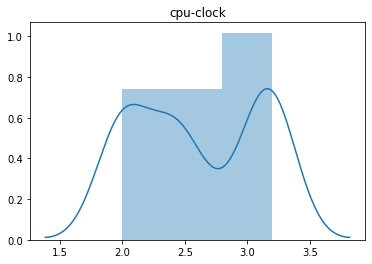

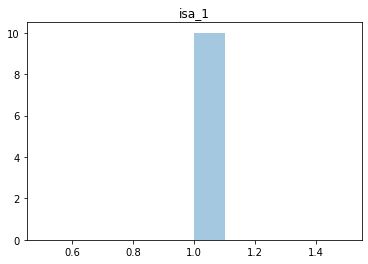

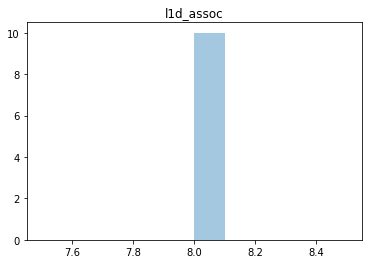

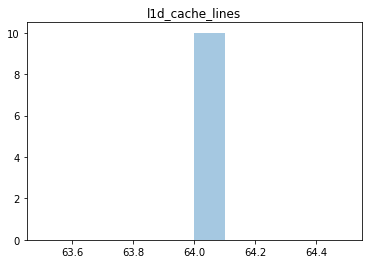

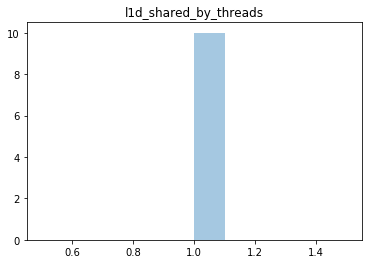

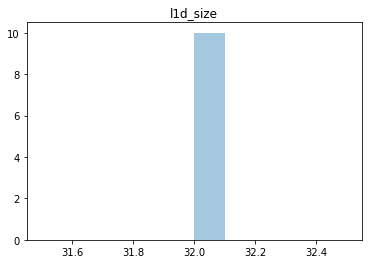

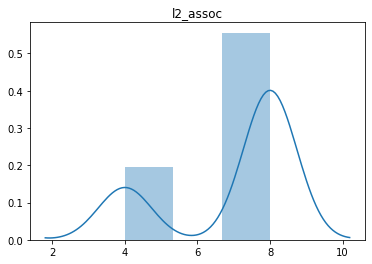

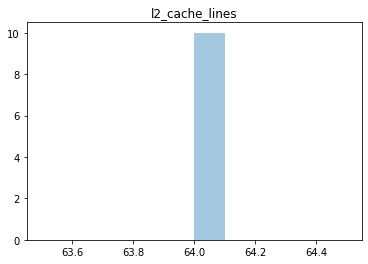

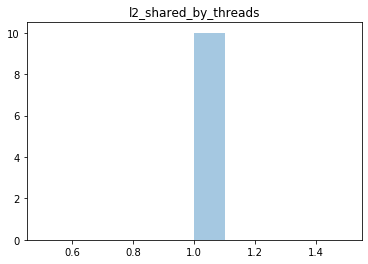

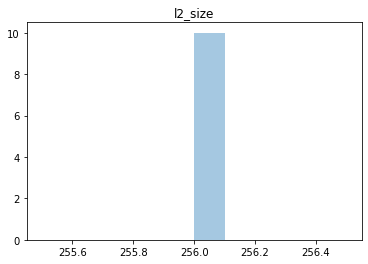

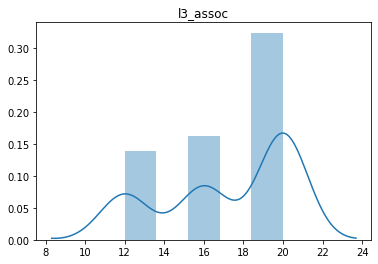

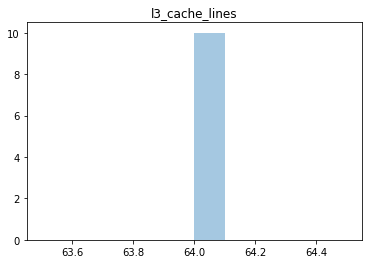

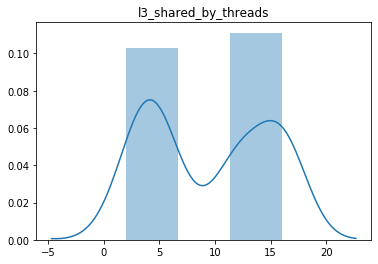

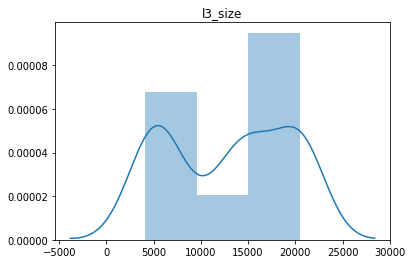

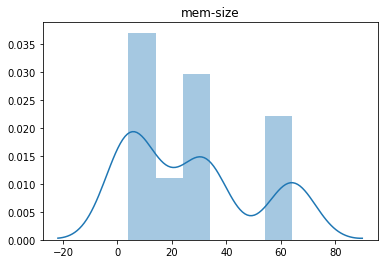

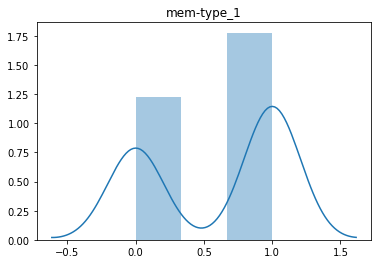

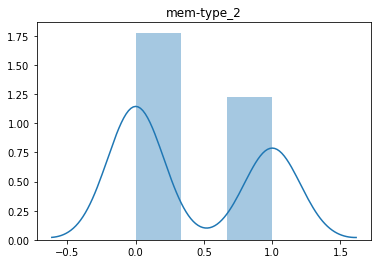

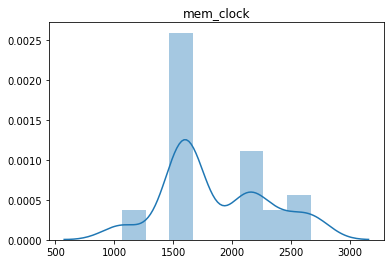

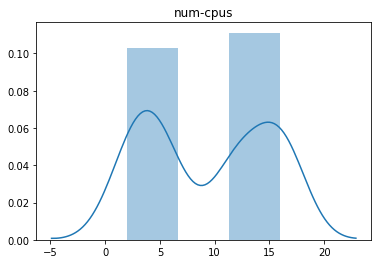

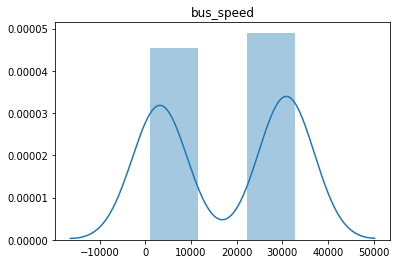

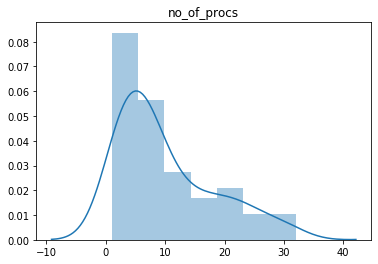

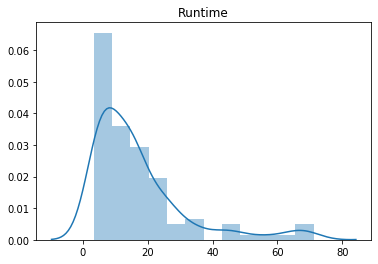

In [22]:
for i in range(X.shape[1]):
    plt.figure()
    plt.title(X_columns[i])
    sns.distplot(X[:,i]) # Also plots Gaussian KDE over data
plt.figure()
plt.title('Runtime')
sns.distplot(Y)

# Understanding Correlations

In [23]:
temp.head(100)

,cpu-clock,isa_1,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,l2_cache_lines,l2_shared_by_threads,l2_size,...,l3_size,mem-size,mem-type_1,mem-type_2,mem_clock,num-cpus,bus_speed,PS,no_of_procs,runtime
0,3.2,1,8,64,1,32,4,64,1,256,...,6144,4,1,0,1600,4,4096.0,B,1,58.08
1,3.2,1,8,64,1,32,4,64,1,256,...,6144,4,1,0,1600,4,4096.0,B,2,29.84
2,3.2,1,8,64,1,32,4,64,1,256,...,6144,4,1,0,1600,4,4096.0,B,3,20.54
3,3.2,1,8,64,1,32,4,64,1,256,...,6144,4,1,0,1600,4,4096.0,B,4,15.80
4,3.2,1,8,64,1,32,4,64,1,256,...,6144,4,1,0,1600,4,4096.0,B,5,16.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3.2,1,8,64,1,32,8,64,1,256,...,6144,4,1,0,1600,4,1024.0,B,4,12.04
96,3.2,1,8,64,1,32,8,64,1,256,...,6144,4,1,0,1600,4,1024.0,B,5,12.40
97,3.2,1,8,64,1,32,8,64,1,256,...,6144,4,1,0,1600,4,1024.0,B,6,14.89
98,3.2,1,8,64,1,32,8,64,1,256,...,6144,4,1,0,1600,4,1024.0,B,7,13.71


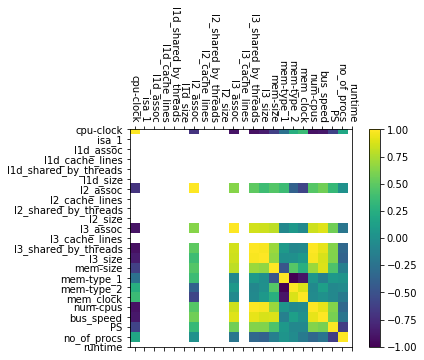

<Figure size 1440x1080 with 0 Axes>

In [26]:
train_data = temp
correlations = train_data.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,23,1)
#ticks = np.arange(0,12,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(train_data.columns, rotation = -90)
ax.set_yticklabels(train_data.columns)
plt.figure(figsize=(20,15))
plt.show()

In [27]:
correlations

,cpu-clock,isa_1,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,l2_cache_lines,l2_shared_by_threads,l2_size,...,l3_shared_by_threads,l3_size,mem-size,mem-type_1,mem-type_2,mem_clock,num-cpus,bus_speed,no_of_procs,runtime
cpu-clock,1.000000,NaN,NaN,NaN,NaN,NaN,-0.698656,NaN,NaN,NaN,...,-0.907022,-0.851449,-0.619646,-0.253957,0.253957,0.361571,-0.900083,-0.868996,-0.596623,0.191927
isa_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l1d_assoc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l1d_cache_lines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l1d_shared_by_threads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l1d_size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l2_assoc,-0.698656,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,0.505232,0.377936,0.461877,0.369494,-0.369494,-0.578870,0.473388,0.570154,0.343071,0.011860
l2_cache_lines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l2_shared_by_threads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l2_size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
def absolute_percentage_error(Y_test, Y_pred):
    error = 0
    for i in range(len(Y_test)):
        if(Y_test[i]!= 0 ):
            error = error + (abs(Y_test[i] - Y_pred[i]))/Y_test[i]
        
    error = error/ len(Y_test)
    return error

# 1. Support Vector Regressor + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.046, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.025, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.135, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.039, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.039, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.142, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ...... C=0.1, gamma=0.01, kernel=rbf, score=-0.059, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.009, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ...... C=0.1, gamma=0.01, kernel=rbf, score=-0.147, total=   0.0s
[CV] C

[CV] .... C=100, gamma=0.0001, kernel=rbf, score=-0.101, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.818, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.730, total=   0.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.329, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.680, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.624, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.482, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
MSE =  363.70281612458325
R2 score = -1.1325646211481448
Mean Absolute Percentage Error is: 2.5382787288111994
Mean Absolute Error is: 18.24685189278308


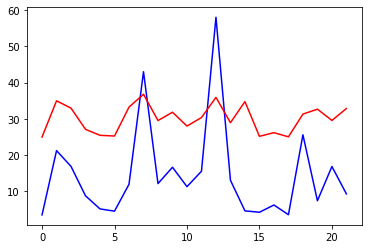

In [29]:
from sklearn.svm import SVR
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              # Regularization parameter. The strength of the regularization is inversely proportional to C. 
              # Must be strictly positive. The penalty is a squared l2 penalty.
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
              # if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
              # if ‘auto’, uses 1 / n_features.
              
              'kernel': ['rbf']} 
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred)) 
print('Mean Absolute Percentage Error is:',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))


# 10 fold cross validation for best SVR

KFold(n_splits=10, random_state=42, shuffle=True)
(97, 21) (11, 21) (97,) (11,)
(97, 21) (11, 21) (97,) (11,)
(97, 21) (11, 21) (97,) (11,)
(97, 21) (11, 21) (97,) (11,)
(97, 21) (11, 21) (97,) (11,)
(97, 21) (11, 21) (97,) (11,)
(97, 21) (11, 21) (97,) (11,)
(97, 21) (11, 21) (97,) (11,)
(98, 21) (10, 21) (98,) (10,)
(98, 21) (10, 21) (98,) (10,)
MSE for 10 folds
 [23.991491795202702, 130.23627500776323, 192.29434127030072, 379.70764400389595, 34.60186476513146, 162.4755308053118, 18.42046003625313, 39.833616895760784, 227.42262506830443, 83.750359133673]

R2 scores for 10 folds
 [0.7867760006010931, 0.42932319530573737, 0.3580864857053532, 0.11675188369032008, 0.2767796174395395, 0.31272244175811137, 0.7747475668311298, 0.707185267924268, 0.300703934841437, 0.3857240495053904]

MAPE for 10 folds
 [0.6138060067395479, 0.5919768077809248, 0.4605469612111257, 0.3619848122392581, 0.9540738867294558, 0.5954525808289474, 0.5346270965900283, 0.8010221790454995, 0.23632609759023393, 0.420733

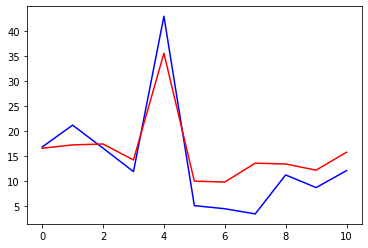

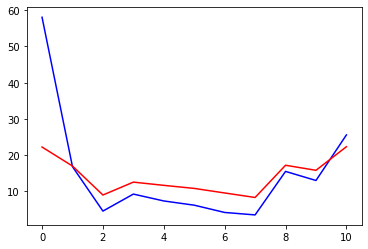

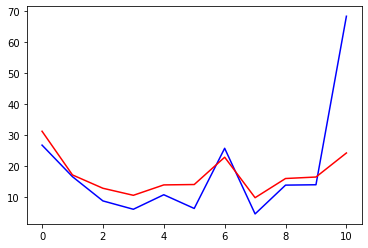

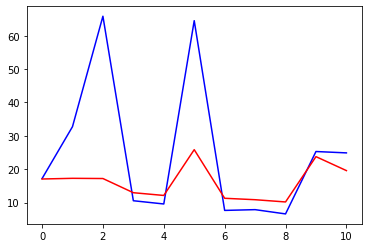

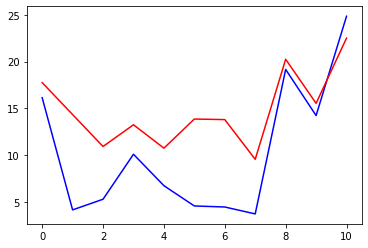

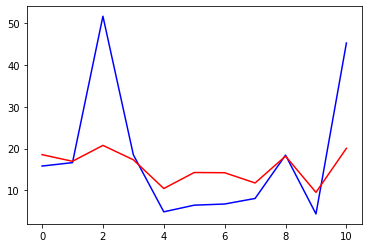

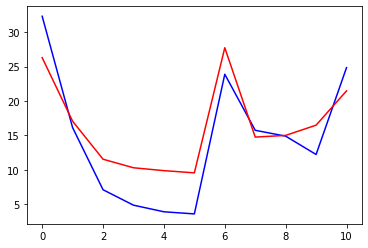

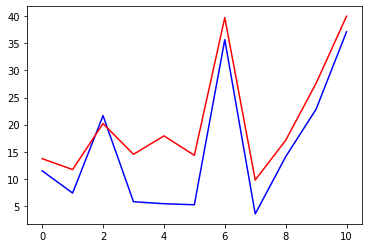

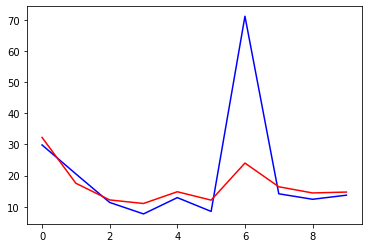

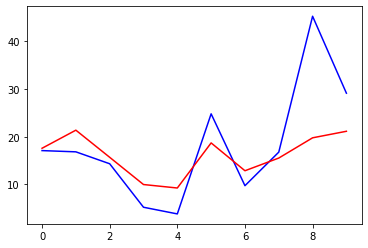

In [30]:
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
from sklearn.svm import SVR
best_svr = SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
for train_index, test_index in cv.split(X):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)

    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    best_svr.fit(X_train_fold, Y_train_fold)
    Y_pred_fold = best_svr.predict(X_test_fold)
    # scores.append(best_svr.score(X_test, y_test))
    
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')
    # print('Accuracy =',accuracy_score(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMAE scores for 10 folds\n', mae_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))    
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))   

# SVR Analysis

## 0. Our best fit line is the line hyperplane that has maximum number of points. (SVR)
## 1. For linear kernel - Data should be linearly seperable - How to know this? - IF not working well, 
## 2. data must be linearly inseperable? 
## 3. C = 1000,-> Less Regularization was needed
## gamma = 0.1 -> Kernel Coefficient ,  rest default
## 4. SVM performs worse on highly skewed datasets (Can be seen by histograms)
## 5. Logistic regression works well on skewed datasets. (But this is a regression problem and logistic regression works great with classificaton problem)
## 6. How to prove whether given dataset is skewed and not linearly separable?
## 7. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. For very tiny values of C, you should get misclassified examples, often even if your training data is linearly separable.

# 5. Gaussian Process Regressor (Marcov Chain Monte Carlo) + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] alpha=1e-10, normalize_y=True ...................................
[CV] ....... alpha=1e-10, normalize_y=True, score=0.645, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] alpha=1e-10, normalize_y=True ...................................
[CV] ..... alpha=1e-10, normalize_y=True, score=-29.228, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] alpha=1e-10, normalize_y=True ...................................
[CV] ...... alpha=1e-10, normalize_y=True, score=-0.760, total=   0.0s
[CV] alpha=1e-10, normalize_y=False ..................................
[CV] ...... alpha=1e-10, normalize_y=False, score=0.644, total=   0.0s
[CV] alpha=1e-10, normalize_y=False ..................................
[CV] .... alpha=1e-10, normalize_y=False, score=-29.274, total=   0.0s
[CV] alpha=1e-10, normalize_y=False ..................................
[CV] ..... alpha=1e-10, normalize_y=False, score=-0.767, total=   0.0s
[CV] alpha=1e-09, normalize_y=True ...................................
[CV] ....... alpha=1e-09, normalize_y=True, score=0.826, total=   0.0s
[CV] alpha=1e-09, normalize_y=True ...................................
[CV] ...... alpha=1e-09, normalize_y=True, score=-9.582, total=   0.0s
[CV] alpha=1e-09, normalize_y=True ...................................
[CV] ...... alpha=1e-09, normalize_y=True, score=-0.661, total=   0.0s
[CV] a

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.2s finished
C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'alpha': 1e-05, 'normalize_y': True}
GaussianProcessRegressor(alpha=1e-05, copy_X_train=True, kernel=None,
                         n_restarts_optimizer=0, normalize_y=True,
                         optimizer='fmin_l_bfgs_b', random_state=None)
MSE =  68.03890500152788
R2 score = 0.6010551603256873

Mean Absolute Percentage Error = 0.7328521615780484
Mean Absolute Error is: 6.08910227591231


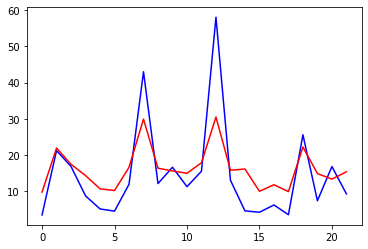

In [31]:
from sklearn.gaussian_process import GaussianProcessRegressor
gpr = GaussianProcessRegressor(kernel=None, alpha=1e-10, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=0 , 
                               normalize_y= True, copy_X_train=True, random_state= None)
# defining parameter range 
param_grid = {'alpha': [1e-10, 1e-9, 1e-5, 1e-2],  
             'normalize_y' : [True, False],
                         } 
grid = GridSearchCV(gpr, param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
# Y_pred = reg.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred))
print('\nMean Absolute Percentage Error =',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))

# 10 fold cross validation for best Gaussian Process Regressor

KFold(n_splits=10, random_state=42, shuffle=True)
(97, 21) (11, 21) (97,) (11,)
(97, 21) (11, 21) (97,) (11,)
(97, 21) (11, 21) (97,) (11,)
(97, 21) (11, 21) (97,) (11,)
(97, 21) (11, 21) (97,) (11,)
(97, 21) (11, 21) (97,) (11,)
(97, 21) (11, 21) (97,) (11,)
(97, 21) (11, 21) (97,) (11,)
(98, 21) (10, 21) (98,) (10,)
(98, 21) (10, 21) (98,) (10,)
MSE for 10 folds
 [13.477167425787558, 92.14582224520508, 146.1140353007952, 297.9907917601233, 10.285563662446961, 125.12069449332661, 12.056974808537678, 51.19658516039655, 181.4464088484345, 74.99039535939907]

R2 scores for 10 folds
 [0.8802218901756786, 0.5962301332583062, 0.5122447531835327, 0.3068356414308624, 0.7850194104480483, 0.47073479329053847, 0.8525626989264209, 0.6236567117125306, 0.44207503669982984, 0.44997493904667407]

MAPE for 10 folds
 [0.3075368370097738, 0.13957681243129946, 0.24062546248533823, 0.21752708752502595, 0.420867360532526, 0.3336532166962255, 0.21430880985640807, 0.4947445366755508, 0.18030210265994503, 0.2

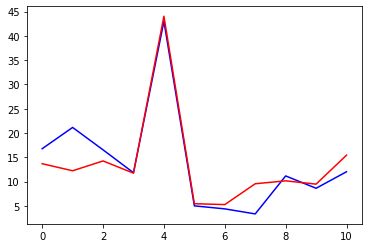

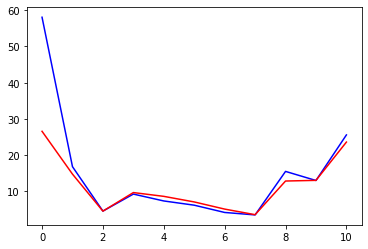

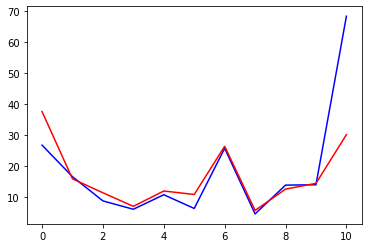

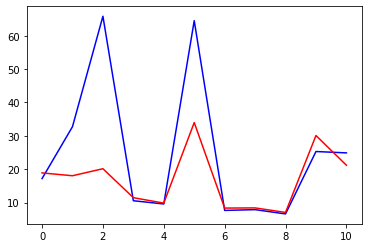

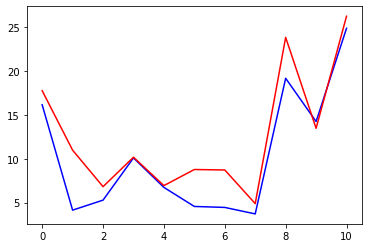

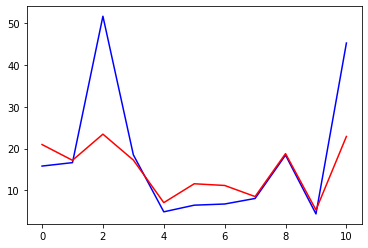

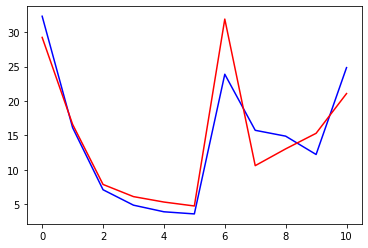

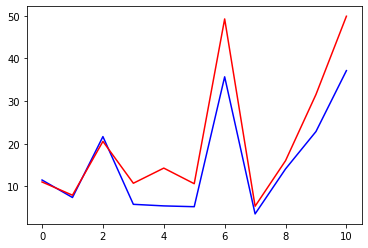

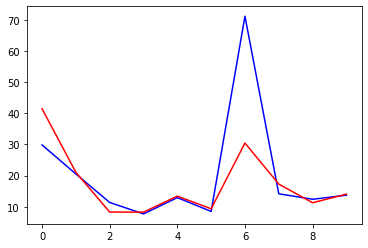

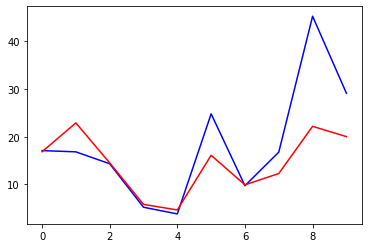

In [32]:
from sklearn.gaussian_process import GaussianProcessRegressor
gpr_best =GaussianProcessRegressor(alpha=1e-05, copy_X_train=True, kernel=None,
                         n_restarts_optimizer=0, normalize_y=True,
                         optimizer='fmin_l_bfgs_b', random_state=None)
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state = 42, shuffle= True)
print(cv)
for train_index, test_index in cv.split(X):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)

    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    gpr_best.fit(X_train_fold, Y_train_fold)
    Y_pred_fold = gpr_best.predict(X_test_fold)
    # scores.append(best_svr.score(X_test, y_test))
    
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')

    # print('Accuracy =',accuracy_score(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMAE scores for 10 folds\n', mae_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))    
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))   

# 9. Gradient boosting regression + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 336 candidates, totalling 1008 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=10 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=10, score=0.680, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=10 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=10, score=0.672, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=10 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=10, score=0.767, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=20 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=20, score=0.814, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=20 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=20, score=0.863, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=20 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=20, score=0.786, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=50 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=50, score=0.863, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=50 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=50, score=0.939, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=3, n_estimato

[CV]  criterion=mse, loss=ls, max_depth=10, n_estimators=20, score=0.725, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=10, n_estimators=50 ...........
[CV]  criterion=mse, loss=ls, max_depth=10, n_estimators=50, score=0.824, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=10, n_estimators=50 ...........
[CV]  criterion=mse, loss=ls, max_depth=10, n_estimators=50, score=0.900, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=10, n_estimators=50 ...........
[CV]  criterion=mse, loss=ls, max_depth=10, n_estimators=50, score=0.628, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=10, n_estimators=100 ..........
[CV]  criterion=mse, loss=ls, max_depth=10, n_estimators=100, score=0.824, total=   0.1s
[CV] criterion=mse, loss=ls, max_depth=10, n_estimators=100 ..........
[CV]  criterion=mse, loss=ls, max_depth=10, n_estimators=100, score=0.902, total=   0.1s
[CV] criterion=mse, loss=ls, max_depth=10, n_estimators=100 ..........
[CV]  criterion=mse, loss=ls, max_depth=10, 

[CV]  criterion=mse, loss=lad, max_depth=4, n_estimators=50, score=0.639, total=   0.1s
[CV] criterion=mse, loss=lad, max_depth=4, n_estimators=100 ..........
[CV]  criterion=mse, loss=lad, max_depth=4, n_estimators=100, score=0.742, total=   0.2s
[CV] criterion=mse, loss=lad, max_depth=4, n_estimators=100 ..........
[CV]  criterion=mse, loss=lad, max_depth=4, n_estimators=100, score=0.963, total=   0.2s
[CV] criterion=mse, loss=lad, max_depth=4, n_estimators=100 ..........
[CV]  criterion=mse, loss=lad, max_depth=4, n_estimators=100, score=0.690, total=   0.2s
[CV] criterion=mse, loss=lad, max_depth=5, n_estimators=10 ...........
[CV]  criterion=mse, loss=lad, max_depth=5, n_estimators=10, score=0.372, total=   0.0s
[CV] criterion=mse, loss=lad, max_depth=5, n_estimators=10 ...........
[CV]  criterion=mse, loss=lad, max_depth=5, n_estimators=10, score=0.602, total=   0.0s
[CV] criterion=mse, loss=lad, max_depth=5, n_estimators=10 ...........
[CV]  criterion=mse, loss=lad, max_depth=5,

[CV]  criterion=mse, loss=lad, max_depth=15, n_estimators=100, score=0.811, total=   0.5s
[CV] criterion=mse, loss=lad, max_depth=None, n_estimators=10 ........
[CV]  criterion=mse, loss=lad, max_depth=None, n_estimators=10, score=0.374, total=   0.0s
[CV] criterion=mse, loss=lad, max_depth=None, n_estimators=10 ........
[CV]  criterion=mse, loss=lad, max_depth=None, n_estimators=10, score=0.612, total=   0.1s
[CV] criterion=mse, loss=lad, max_depth=None, n_estimators=10 ........
[CV]  criterion=mse, loss=lad, max_depth=None, n_estimators=10, score=0.421, total=   0.0s
[CV] criterion=mse, loss=lad, max_depth=None, n_estimators=20 ........
[CV]  criterion=mse, loss=lad, max_depth=None, n_estimators=20, score=0.571, total=   0.1s
[CV] criterion=mse, loss=lad, max_depth=None, n_estimators=20 ........
[CV]  criterion=mse, loss=lad, max_depth=None, n_estimators=20, score=0.874, total=   0.1s
[CV] criterion=mse, loss=lad, max_depth=None, n_estimators=20 ........
[CV]  criterion=mse, loss=lad

[CV] criterion=mse, loss=huber, max_depth=7, n_estimators=10 .........
[CV]  criterion=mse, loss=huber, max_depth=7, n_estimators=10, score=0.758, total=   0.1s
[CV] criterion=mse, loss=huber, max_depth=7, n_estimators=20 .........
[CV]  criterion=mse, loss=huber, max_depth=7, n_estimators=20, score=0.762, total=   0.2s
[CV] criterion=mse, loss=huber, max_depth=7, n_estimators=20 .........
[CV]  criterion=mse, loss=huber, max_depth=7, n_estimators=20, score=0.857, total=   0.2s
[CV] criterion=mse, loss=huber, max_depth=7, n_estimators=20 .........
[CV]  criterion=mse, loss=huber, max_depth=7, n_estimators=20, score=0.822, total=   0.2s
[CV] criterion=mse, loss=huber, max_depth=7, n_estimators=50 .........
[CV]  criterion=mse, loss=huber, max_depth=7, n_estimators=50, score=0.828, total=   0.4s
[CV] criterion=mse, loss=huber, max_depth=7, n_estimators=50 .........
[CV]  criterion=mse, loss=huber, max_depth=7, n_estimators=50, score=0.891, total=   0.5s
[CV] criterion=mse, loss=huber, ma

[CV] criterion=mse, loss=quantile, max_depth=3, n_estimators=20 ......
[CV]  criterion=mse, loss=quantile, max_depth=3, n_estimators=20, score=0.031, total=   0.0s
[CV] criterion=mse, loss=quantile, max_depth=3, n_estimators=20 ......
[CV]  criterion=mse, loss=quantile, max_depth=3, n_estimators=20, score=0.372, total=   0.0s
[CV] criterion=mse, loss=quantile, max_depth=3, n_estimators=50 ......
[CV]  criterion=mse, loss=quantile, max_depth=3, n_estimators=50, score=0.808, total=   0.1s
[CV] criterion=mse, loss=quantile, max_depth=3, n_estimators=50 ......
[CV]  criterion=mse, loss=quantile, max_depth=3, n_estimators=50, score=0.690, total=   0.2s
[CV] criterion=mse, loss=quantile, max_depth=3, n_estimators=50 ......
[CV]  criterion=mse, loss=quantile, max_depth=3, n_estimators=50, score=0.648, total=   0.2s
[CV] criterion=mse, loss=quantile, max_depth=3, n_estimators=100 .....
[CV]  criterion=mse, loss=quantile, max_depth=3, n_estimators=100, score=0.871, total=   0.3s
[CV] criterion=

[CV]  criterion=mse, loss=quantile, max_depth=10, n_estimators=20, score=0.467, total=   0.0s
[CV] criterion=mse, loss=quantile, max_depth=10, n_estimators=50 .....
[CV]  criterion=mse, loss=quantile, max_depth=10, n_estimators=50, score=0.830, total=   0.1s
[CV] criterion=mse, loss=quantile, max_depth=10, n_estimators=50 .....
[CV]  criterion=mse, loss=quantile, max_depth=10, n_estimators=50, score=0.686, total=   0.1s
[CV] criterion=mse, loss=quantile, max_depth=10, n_estimators=50 .....
[CV]  criterion=mse, loss=quantile, max_depth=10, n_estimators=50, score=0.734, total=   0.1s
[CV] criterion=mse, loss=quantile, max_depth=10, n_estimators=100 ....
[CV]  criterion=mse, loss=quantile, max_depth=10, n_estimators=100, score=0.884, total=   0.3s
[CV] criterion=mse, loss=quantile, max_depth=10, n_estimators=100 ....
[CV]  criterion=mse, loss=quantile, max_depth=10, n_estimators=100, score=0.823, total=   0.3s
[CV] criterion=mse, loss=quantile, max_depth=10, n_estimators=100 ....
[CV]  cr

[CV]  criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=50, score=0.804, total=   0.0s
[CV] criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=50 ...
[CV]  criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=50, score=0.923, total=   0.0s
[CV] criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=50 ...
[CV]  criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=50, score=0.685, total=   0.0s
[CV] criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=100 ..
[CV]  criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=100, score=0.808, total=   0.0s
[CV] criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=100 ..
[CV]  criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=100, score=0.929, total=   0.0s
[CV] criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=100 ..
[CV]  criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=100, score=0.683, total=   0.0s
[CV] criterion=friedman_mse, loss=ls, max_depth=5, n_estimators=10

[CV] criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=50 ..
[CV]  criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=50, score=0.902, total=   0.0s
[CV] criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=50 ..
[CV]  criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=50, score=0.631, total=   0.0s
[CV] criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=100 .
[CV]  criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=100, score=0.823, total=   0.1s
[CV] criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=100 .
[CV]  criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=100, score=0.903, total=   0.1s
[CV] criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=100 .
[CV]  criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=100, score=0.626, total=   0.1s
[CV] criterion=friedman_mse, loss=ls, max_depth=None, n_estimators=10 
[CV]  criterion=friedman_mse, loss=ls, max_depth=None, n_estimators=10, score=0.709, t

[CV]  criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=50, score=0.923, total=   0.1s
[CV] criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=50 ..
[CV]  criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=50, score=0.808, total=   0.1s
[CV] criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=100 .
[CV]  criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=100, score=0.738, total=   0.2s
[CV] criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=100 .
[CV]  criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=100, score=0.943, total=   0.2s
[CV] criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=100 .
[CV]  criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=100, score=0.836, total=   0.2s
[CV] criterion=friedman_mse, loss=lad, max_depth=7, n_estimators=10 ..
[CV]  criterion=friedman_mse, loss=lad, max_depth=7, n_estimators=10, score=0.364, total=   0.0s
[CV] criterion=friedman_mse, loss=lad, max_depth=7, n_estima

[CV]  criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=50, score=0.951, total=   0.2s
[CV] criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=50 
[CV]  criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=50, score=0.804, total=   0.2s
[CV] criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=100 
[CV]  criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=100, score=0.756, total=   0.5s
[CV] criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=100 
[CV]  criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=100, score=0.960, total=   0.6s
[CV] criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=100 
[CV]  criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=100, score=0.814, total=   0.5s
[CV] criterion=friedman_mse, loss=huber, max_depth=3, n_estimators=10 
[CV]  criterion=friedman_mse, loss=huber, max_depth=3, n_estimators=10, score=0.554, total=   0.0s
[CV] criterion=friedman_mse, loss=hu

[CV]  criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=50, score=0.893, total=   0.4s
[CV] criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=50 
[CV]  criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=50, score=0.823, total=   0.5s
[CV] criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=100 
[CV]  criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=100, score=0.836, total=   0.9s
[CV] criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=100 
[CV]  criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=100, score=0.894, total=   0.9s
[CV] criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=100 
[CV]  criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=100, score=0.825, total=   0.8s
[CV] criterion=friedman_mse, loss=huber, max_depth=10, n_estimators=10 
[CV]  criterion=friedman_mse, loss=huber, max_depth=10, n_estimators=10, score=0.653, total=   0.1s
[CV] criterion=friedman_mse, loss=huber, ma

[CV]  criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=50, score=0.748, total=   0.1s
[CV] criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=50 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=50, score=0.690, total=   0.1s
[CV] criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=50 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=50, score=0.646, total=   0.1s
[CV] criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=100 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=100, score=0.864, total=   0.1s
[CV] criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=100 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=100, score=0.814, total=   0.2s
[CV] criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=100 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=100, score=0.775, total=   0.2s
[CV] criteri

[CV]  criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=20, score=0.065, total=   0.1s
[CV] criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=20 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=20, score=0.465, total=   0.0s
[CV] criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=50 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=50, score=0.811, total=   0.1s
[CV] criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=50 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=50, score=0.686, total=   0.1s
[CV] criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=50 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=50, score=0.731, total=   0.1s
[CV] criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=100 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=100, score=0.860, total=   0.4s
[CV] 

[CV]  criterion=mae, loss=ls, max_depth=4, n_estimators=20, score=0.794, total=   0.0s
[CV] criterion=mae, loss=ls, max_depth=4, n_estimators=20 ............
[CV]  criterion=mae, loss=ls, max_depth=4, n_estimators=20, score=0.868, total=   0.0s
[CV] criterion=mae, loss=ls, max_depth=4, n_estimators=20 ............
[CV]  criterion=mae, loss=ls, max_depth=4, n_estimators=20, score=0.802, total=   0.0s
[CV] criterion=mae, loss=ls, max_depth=4, n_estimators=50 ............
[CV]  criterion=mae, loss=ls, max_depth=4, n_estimators=50, score=0.827, total=   0.1s
[CV] criterion=mae, loss=ls, max_depth=4, n_estimators=50 ............
[CV]  criterion=mae, loss=ls, max_depth=4, n_estimators=50, score=0.923, total=   0.1s
[CV] criterion=mae, loss=ls, max_depth=4, n_estimators=50 ............
[CV]  criterion=mae, loss=ls, max_depth=4, n_estimators=50, score=0.751, total=   0.1s
[CV] criterion=mae, loss=ls, max_depth=4, n_estimators=100 ...........
[CV]  criterion=mae, loss=ls, max_depth=4, n_estimat

[CV] criterion=mae, loss=ls, max_depth=15, n_estimators=50 ...........
[CV]  criterion=mae, loss=ls, max_depth=15, n_estimators=50, score=0.889, total=   0.1s
[CV] criterion=mae, loss=ls, max_depth=15, n_estimators=50 ...........
[CV]  criterion=mae, loss=ls, max_depth=15, n_estimators=50, score=0.882, total=   0.1s
[CV] criterion=mae, loss=ls, max_depth=15, n_estimators=100 ..........
[CV]  criterion=mae, loss=ls, max_depth=15, n_estimators=100, score=0.831, total=   0.2s
[CV] criterion=mae, loss=ls, max_depth=15, n_estimators=100 ..........
[CV]  criterion=mae, loss=ls, max_depth=15, n_estimators=100, score=0.891, total=   0.2s
[CV] criterion=mae, loss=ls, max_depth=15, n_estimators=100 ..........
[CV]  criterion=mae, loss=ls, max_depth=15, n_estimators=100, score=0.882, total=   0.2s
[CV] criterion=mae, loss=ls, max_depth=None, n_estimators=10 .........
[CV]  criterion=mae, loss=ls, max_depth=None, n_estimators=10, score=0.711, total=   0.0s
[CV] criterion=mae, loss=ls, max_depth=No

[CV] criterion=mae, loss=lad, max_depth=5, n_estimators=100 ..........
[CV]  criterion=mae, loss=lad, max_depth=5, n_estimators=100, score=0.908, total=   0.4s
[CV] criterion=mae, loss=lad, max_depth=5, n_estimators=100 ..........
[CV]  criterion=mae, loss=lad, max_depth=5, n_estimators=100, score=0.627, total=   0.4s
[CV] criterion=mae, loss=lad, max_depth=7, n_estimators=10 ...........
[CV]  criterion=mae, loss=lad, max_depth=7, n_estimators=10, score=0.284, total=   0.0s
[CV] criterion=mae, loss=lad, max_depth=7, n_estimators=10 ...........
[CV]  criterion=mae, loss=lad, max_depth=7, n_estimators=10, score=0.514, total=   0.0s
[CV] criterion=mae, loss=lad, max_depth=7, n_estimators=10 ...........
[CV]  criterion=mae, loss=lad, max_depth=7, n_estimators=10, score=0.356, total=   0.0s
[CV] criterion=mae, loss=lad, max_depth=7, n_estimators=20 ...........
[CV]  criterion=mae, loss=lad, max_depth=7, n_estimators=20, score=0.479, total=   0.1s
[CV] criterion=mae, loss=lad, max_depth=7, n

[CV] criterion=mae, loss=huber, max_depth=3, n_estimators=10 .........
[CV]  criterion=mae, loss=huber, max_depth=3, n_estimators=10, score=0.701, total=   0.0s
[CV] criterion=mae, loss=huber, max_depth=3, n_estimators=10 .........
[CV]  criterion=mae, loss=huber, max_depth=3, n_estimators=10, score=0.756, total=   0.0s
[CV] criterion=mae, loss=huber, max_depth=3, n_estimators=20 .........
[CV]  criterion=mae, loss=huber, max_depth=3, n_estimators=20, score=0.722, total=   0.1s
[CV] criterion=mae, loss=huber, max_depth=3, n_estimators=20 .........
[CV]  criterion=mae, loss=huber, max_depth=3, n_estimators=20, score=0.824, total=   0.1s
[CV] criterion=mae, loss=huber, max_depth=3, n_estimators=20 .........
[CV]  criterion=mae, loss=huber, max_depth=3, n_estimators=20, score=0.876, total=   0.1s
[CV] criterion=mae, loss=huber, max_depth=3, n_estimators=50 .........
[CV]  criterion=mae, loss=huber, max_depth=3, n_estimators=50, score=0.842, total=   0.1s
[CV] criterion=mae, loss=huber, ma

[CV]  criterion=mae, loss=huber, max_depth=10, n_estimators=20, score=0.722, total=   0.2s
[CV] criterion=mae, loss=huber, max_depth=10, n_estimators=20 ........
[CV]  criterion=mae, loss=huber, max_depth=10, n_estimators=20, score=0.905, total=   0.2s
[CV] criterion=mae, loss=huber, max_depth=10, n_estimators=20 ........
[CV]  criterion=mae, loss=huber, max_depth=10, n_estimators=20, score=0.831, total=   0.2s
[CV] criterion=mae, loss=huber, max_depth=10, n_estimators=50 ........
[CV]  criterion=mae, loss=huber, max_depth=10, n_estimators=50, score=0.809, total=   0.6s
[CV] criterion=mae, loss=huber, max_depth=10, n_estimators=50 ........
[CV]  criterion=mae, loss=huber, max_depth=10, n_estimators=50, score=0.929, total=   0.6s
[CV] criterion=mae, loss=huber, max_depth=10, n_estimators=50 ........
[CV]  criterion=mae, loss=huber, max_depth=10, n_estimators=50, score=0.816, total=   0.6s
[CV] criterion=mae, loss=huber, max_depth=10, n_estimators=100 .......
[CV]  criterion=mae, loss=hu

[CV]  criterion=mae, loss=quantile, max_depth=4, n_estimators=20, score=0.372, total=   0.0s
[CV] criterion=mae, loss=quantile, max_depth=4, n_estimators=50 ......
[CV]  criterion=mae, loss=quantile, max_depth=4, n_estimators=50, score=0.648, total=   0.1s
[CV] criterion=mae, loss=quantile, max_depth=4, n_estimators=50 ......
[CV]  criterion=mae, loss=quantile, max_depth=4, n_estimators=50, score=0.277, total=   0.1s
[CV] criterion=mae, loss=quantile, max_depth=4, n_estimators=50 ......
[CV]  criterion=mae, loss=quantile, max_depth=4, n_estimators=50, score=0.557, total=   0.1s
[CV] criterion=mae, loss=quantile, max_depth=4, n_estimators=100 .....
[CV]  criterion=mae, loss=quantile, max_depth=4, n_estimators=100, score=0.674, total=   0.2s
[CV] criterion=mae, loss=quantile, max_depth=4, n_estimators=100 .....
[CV]  criterion=mae, loss=quantile, max_depth=4, n_estimators=100, score=0.445, total=   0.2s
[CV] criterion=mae, loss=quantile, max_depth=4, n_estimators=100 .....
[CV]  criterio

[CV] criterion=mae, loss=quantile, max_depth=15, n_estimators=50 .....
[CV]  criterion=mae, loss=quantile, max_depth=15, n_estimators=50, score=0.568, total=   0.3s
[CV] criterion=mae, loss=quantile, max_depth=15, n_estimators=50 .....
[CV]  criterion=mae, loss=quantile, max_depth=15, n_estimators=50, score=0.847, total=   0.2s
[CV] criterion=mae, loss=quantile, max_depth=15, n_estimators=100 ....
[CV]  criterion=mae, loss=quantile, max_depth=15, n_estimators=100, score=0.794, total=   0.7s
[CV] criterion=mae, loss=quantile, max_depth=15, n_estimators=100 ....
[CV]  criterion=mae, loss=quantile, max_depth=15, n_estimators=100, score=0.744, total=   0.5s
[CV] criterion=mae, loss=quantile, max_depth=15, n_estimators=100 ....
[CV]  criterion=mae, loss=quantile, max_depth=15, n_estimators=100, score=0.860, total=   0.6s
[CV] criterion=mae, loss=quantile, max_depth=None, n_estimators=10 ...
[CV]  criterion=mae, loss=quantile, max_depth=None, n_estimators=10, score=0.319, total=   0.1s
[CV] 

[Parallel(n_jobs=1)]: Done 1008 out of 1008 | elapsed:  3.0min finished
C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'mae', 'loss': 'huber', 'max_depth': 3, 'n_estimators': 100}
GradientBoostingRegressor(alpha=0.9, criterion='mae', init=None,
                          learning_rate=0.1, loss='huber', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
MSE =  15.826145468725478
R2 score = 0.9072036937316781

Mean Absolute Percentage Error = 0.22899036991125116
Mean Absolute Error is: 2.7297573757732607


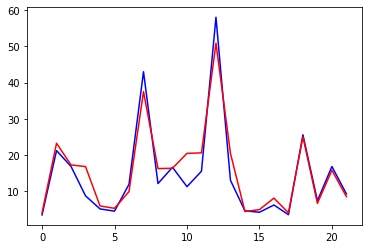

In [33]:
from sklearn import ensemble
reg = ensemble.GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100,
                                         subsample=1.0, criterion='friedman_mse', min_samples_split=2,
                                         min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3,
                                         min_impurity_decrease=0.0, min_impurity_split=None, 
                                         init=None, random_state= 42, max_features=None, 
                                         alpha=0.9, verbose=0, max_leaf_nodes=None, 
                                         warm_start=False, validation_fraction=0.1, n_iter_no_change=None, 
                                         tol=0.0001)
# defining parameter range
param_grid = {'n_estimators' : [10, 20, 50, 100],
              
              'criterion': ['mse','friedman_mse', 'mae'],  
              'max_depth': [3,4,5,7,10,15, None ],
              'loss' : ['ls', 'lad', 'huber', 'quantile'],
             }
'''param_grid = {'n_estimators' : [10, 20, 50, 100],
              'criterion': ['mse','friedman_mse', 'mae'],  
              'max_depth': [3,4,5,7,10,15 None ],
              'max_features' : ['auto', 'sqrt', 'log2', None],
              'max_leaf_nodes' : [None, 10, 20,50, 100], 
              'warm_start': ['True', 'False'],
              'loss' : ['ls', 'lad', 'huber', 'quantile'],
              'learning_rate' : [0.1, 0.5, 0.01, 0.001, 0.0001],
              'subsample': [0.2, 0.4, 0.6, 0.8, 1],
              'validation_fraction': [0.2, 0.1, 0.3, 0.4]
             } '''
grid = GridSearchCV(reg, param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
# Y_pred = reg.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred))
print('\nMean Absolute Percentage Error =',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))

# 10 fold cross validation for best GBR

KFold(n_splits=10, random_state=42, shuffle=True)
(97, 21) (11, 21) (97,) (11,)
(97, 21) (11, 21) (97,) (11,)
(97, 21) (11, 21) (97,) (11,)
(97, 21) (11, 21) (97,) (11,)
(97, 21) (11, 21) (97,) (11,)
(97, 21) (11, 21) (97,) (11,)
(97, 21) (11, 21) (97,) (11,)
(97, 21) (11, 21) (97,) (11,)
(98, 21) (10, 21) (98,) (10,)
(98, 21) (10, 21) (98,) (10,)
MSE for 10 folds
 [5.1645673407140835, 17.69872835592779, 27.770999975975915, 28.081811907126745, 1.5783920714495532, 1.579084254912817, 6.225773384381077, 14.174041949199731, 33.49743256343147, 8.189004443638954]

R2 scores for 10 folds
 [0.954099990406923, 0.9224466935597586, 0.907295346954609, 0.934678145512188, 0.9670097168030531, 0.9933204146766252, 0.9238688610148803, 0.8958073953804883, 0.8969995936970363, 0.9399368726265152]

MAPE for 10 folds
 [0.08959256915128005, 0.10996457959051692, 0.12142440767386913, 0.07477083392954602, 0.08002654177789897, 0.09003084579234354, 0.07788495151506976, 0.11447369853984352, 0.07974010593330536, 0.1

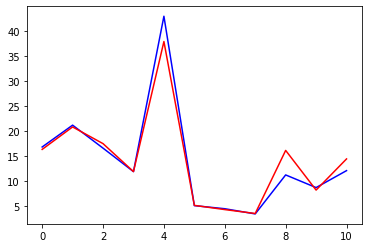

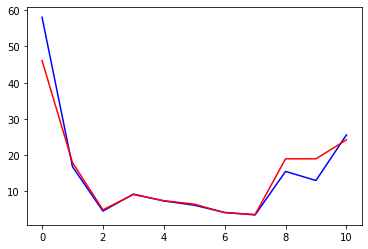

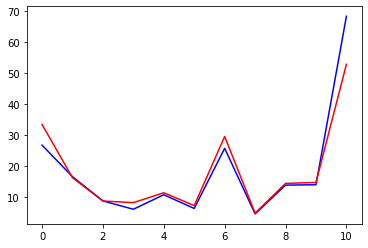

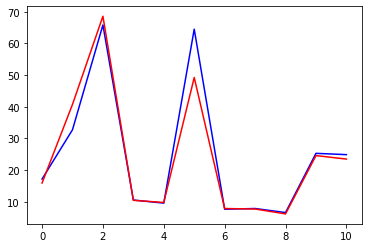

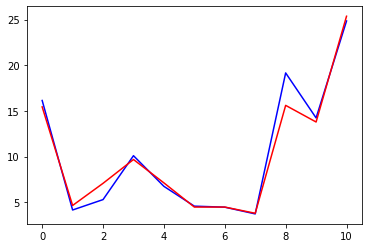

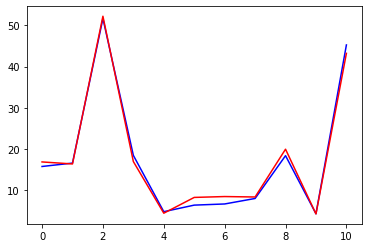

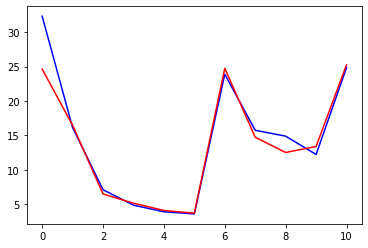

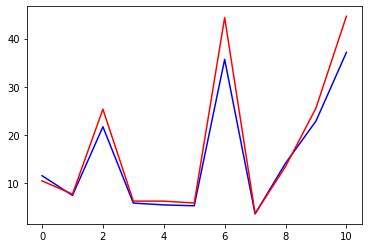

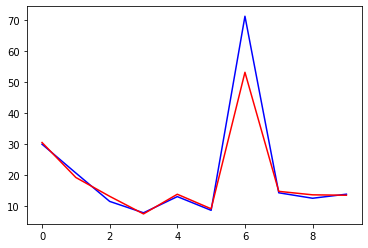

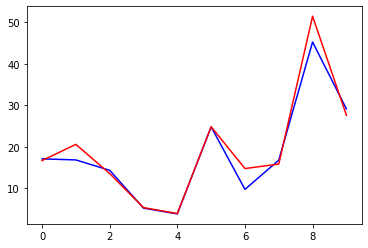

In [34]:
from sklearn import ensemble
reg_best = ensemble.GradientBoostingRegressor(alpha=0.9, criterion='mae', init=None,
                          learning_rate=0.1, loss='huber', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
for train_index, test_index in cv.split(X):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)

    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    reg_best.fit(X_train_fold, Y_train_fold)
    Y_pred_fold = reg_best.predict(X_test_fold)
    # scores.append(best_svr.score(X_test, y_test))
    
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')
    # print('Accuracy =',accuracy_score(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMAE scores for 10 folds\n', mae_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))    
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))   

# 10. XGB Boost + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] learning_rate=0.1, max_depth=3, n_estimators=10 .................
[11:22:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=10, score=0.096, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] learning_rate=0.1, max_depth=3, n_estimators=10 .................
[11:22:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=10, score=0.272, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] learning_rate=0.1, max_depth=3, n_estimators=10 .................
[11:22:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=10, score=0.047, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=20 .................
[11:22:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=20, score=0.429, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=20 .................
[11:22:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=20, score=0.570, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators

[CV]  learning_rate=0.1, max_depth=5, n_estimators=20, score=0.433, total=   0.0s
[CV] learning_rate=0.1, max_depth=5, n_estimators=20 .................
[11:22:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=5, n_estimators=20, score=0.578, total=   0.0s
[CV] learning_rate=0.1, max_depth=5, n_estimators=20 .................
[11:22:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=5, n_estimators=20, score=0.438, total=   0.0s
[CV] learning_rate=0.1, max_depth=5, n_estimators=50 .................
[11:22:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=5, n_estimator

[11:23:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=10, n_estimators=20, score=0.435, total=   0.0s
[CV] learning_rate=0.1, max_depth=10, n_estimators=50 ................
[11:23:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=10, n_estimators=50, score=0.686, total=   0.0s
[CV] learning_rate=0.1, max_depth=10, n_estimators=50 ................
[11:23:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=10, n_estimators=50, score=0.814, total=   0.0s
[CV] learning_rate=0.1, max_depth=10, n_estimators=50 ................
[11:23:00] WARNING: C:/Jenkins/workspace/xgboo

[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.887, total=   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[11:23:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.943, total=   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[11:23:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.901, total=   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=100 ................
[11:23:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=3, n_estimator

[11:23:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=5, n_estimators=50, score=0.906, total=   0.0s
[CV] learning_rate=0.5, max_depth=5, n_estimators=100 ................
[11:23:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100, score=0.894, total=   0.0s
[CV] learning_rate=0.5, max_depth=5, n_estimators=100 ................
[11:23:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100, score=0.936, total=   0.0s
[CV] learning_rate=0.5, max_depth=5, n_estimators=100 ................
[11:23:02] WARNING: C:/Jenkins/workspace/xgboos

[CV] learning_rate=0.5, max_depth=10, n_estimators=100 ...............
[11:23:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=10, n_estimators=100, score=0.931, total=   0.0s
[CV] learning_rate=0.5, max_depth=10, n_estimators=100 ...............
[11:23:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=10, n_estimators=100, score=0.899, total=   0.0s
[CV] learning_rate=0.5, max_depth=15, n_estimators=10 ................
[11:23:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=15, n_estimators=10, score=0.779, total=   0.0s
[CV] learning_rate=0.5, max_depth=15, n_esti

[11:23:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=3, n_estimators=100, score=-0.121, total=   0.0s
[CV] learning_rate=0.01, max_depth=4, n_estimators=10 ................
[11:23:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=4, n_estimators=10, score=-0.838, total=   0.0s
[CV] learning_rate=0.01, max_depth=4, n_estimators=10 ................
[11:23:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=4, n_estimators=10, score=-1.170, total=   0.0s
[CV] learning_rate=0.01, max_depth=4, n_estimators=10 ................
[11:23:03] WARNING: C:/Jenkins/workspace/x

[CV]  learning_rate=0.01, max_depth=7, n_estimators=10, score=-0.838, total=   0.0s
[CV] learning_rate=0.01, max_depth=7, n_estimators=10 ................
[11:23:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=7, n_estimators=10, score=-1.170, total=   0.0s
[CV] learning_rate=0.01, max_depth=7, n_estimators=10 ................
[11:23:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=7, n_estimators=10, score=-1.254, total=   0.0s
[CV] learning_rate=0.01, max_depth=7, n_estimators=20 ................
[11:23:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=7, n_es

[11:23:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=15, n_estimators=10, score=-1.254, total=   0.0s
[CV] learning_rate=0.01, max_depth=15, n_estimators=20 ...............
[11:23:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=15, n_estimators=20, score=-0.676, total=   0.0s
[CV] learning_rate=0.01, max_depth=15, n_estimators=20 ...............
[11:23:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=15, n_estimators=20, score=-0.884, total=   0.0s
[CV] learning_rate=0.01, max_depth=15, n_estimators=20 ...............
[11:23:05] WARNING: C:/Jenkins/workspace

[CV]  learning_rate=0.001, max_depth=4, n_estimators=20, score=-0.988, total=   0.0s
[CV] learning_rate=0.001, max_depth=4, n_estimators=20 ...............
[11:23:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=4, n_estimators=20, score=-1.443, total=   0.0s
[CV] learning_rate=0.001, max_depth=4, n_estimators=20 ...............
[11:23:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=4, n_estimators=20, score=-1.484, total=   0.0s
[CV] learning_rate=0.001, max_depth=4, n_estimators=50 ...............
[11:23:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=4, 

[11:23:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=7, n_estimators=20, score=-1.484, total=   0.0s
[CV] learning_rate=0.001, max_depth=7, n_estimators=50 ...............
[11:23:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=7, n_estimators=50, score=-0.931, total=   0.0s
[CV] learning_rate=0.001, max_depth=7, n_estimators=50 ...............
[11:23:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=7, n_estimators=50, score=-1.334, total=   0.0s
[CV] learning_rate=0.001, max_depth=7, n_estimators=50 ...............
[11:23:06] WARNING: C:/Jenkins/workspace

[CV]  learning_rate=0.001, max_depth=15, n_estimators=50, score=-0.931, total=   0.0s
[CV] learning_rate=0.001, max_depth=15, n_estimators=50 ..............
[11:23:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=15, n_estimators=50, score=-1.334, total=   0.0s
[CV] learning_rate=0.001, max_depth=15, n_estimators=50 ..............
[11:23:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=15, n_estimators=50, score=-1.399, total=   0.0s
[CV] learning_rate=0.001, max_depth=15, n_estimators=100 .............
[11:23:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=

[11:23:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=4, n_estimators=50, score=-1.532, total=   0.0s
[CV] learning_rate=0.0001, max_depth=4, n_estimators=100 .............
[11:23:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=4, n_estimators=100, score=-1.009, total=   0.0s
[CV] learning_rate=0.0001, max_depth=4, n_estimators=100 .............
[11:23:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=4, n_estimators=100, score=-1.479, total=   0.0s
[CV] learning_rate=0.0001, max_depth=4, n_estimators=100 .............
[11:23:08] WARNING: C:/Jenkins/work

[11:23:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=7, n_estimators=100, score=-1.009, total=   0.0s
[CV] learning_rate=0.0001, max_depth=7, n_estimators=100 .............
[11:23:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=7, n_estimators=100, score=-1.479, total=   0.0s
[CV] learning_rate=0.0001, max_depth=7, n_estimators=100 .............
[11:23:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=7, n_estimators=100, score=-1.518, total=   0.0s
[CV] learning_rate=0.0001, max_depth=10, n_estimators=10 .............
[11:23:09] WARNING: C:/Jenkins/wor

[11:23:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=15, n_estimators=100, score=-1.479, total=   0.0s
[CV] learning_rate=0.0001, max_depth=15, n_estimators=100 ............
[11:23:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=15, n_estimators=100, score=-1.518, total=   0.0s


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   11.1s finished
C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[11:23:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 100}
XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.5, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, validate_parameters=False, verbosity=1)
MSE =  34.251572553313835
R2 score = 0.7991665486008626

Mean Absolute Percentage Error = 0.3773616132809128
Mean Absolute Error is: 4.482300889708778


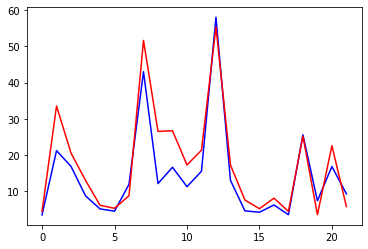

In [35]:
import xgboost as xgb
# data_dmatrix = xgb.DMatrix(data=X_train,label=Y_train)
reg = xgb.XGBRegressor(booster = 'gbtree',validate_parameters = False,  
                objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
# defining parameter range 
param_grid = {'n_estimators' : [10, 20, 50, 100], 
              'max_depth': [3,4,5,7,10,15],
              'learning_rate' : [0.1, 0.5, 0.01, 0.001, 0.0001]      
             } 
grid = GridSearchCV(reg, param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
# Y_pred = reg.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred))
print('\nMean Absolute Percentage Error =',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))

# # 10 fold cross validation for best XGB 

KFold(n_splits=10, random_state=42, shuffle=True)
(97, 21) (11, 21) (97,) (11,)
[11:23:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(97, 21) (11, 21) (97,) (11,)
[11:23:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(97, 21) (11, 21) (97,) (11,)
[11:23:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(97, 21) (11, 21) (97,) (11,)
[11:23:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(97, 21) (11, 21) (97,) (11,)
[11:23:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor o

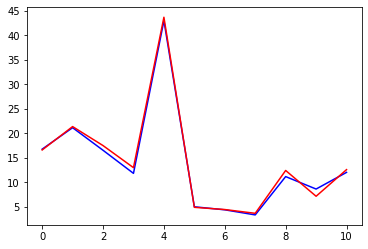

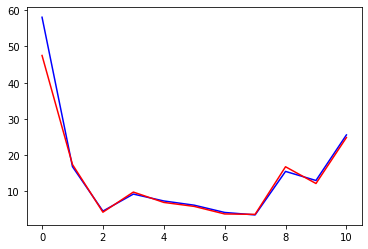

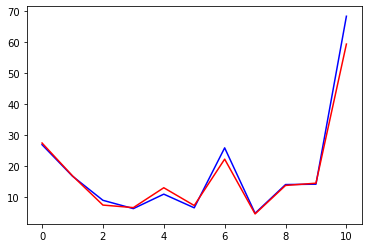

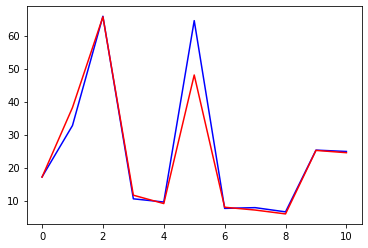

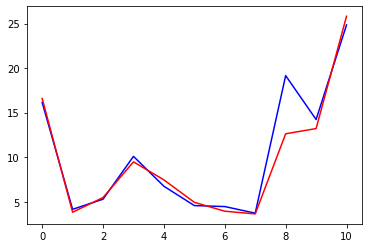

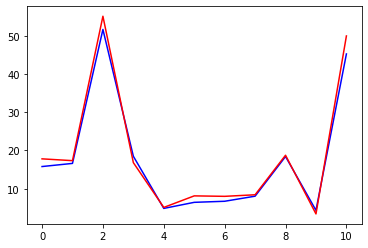

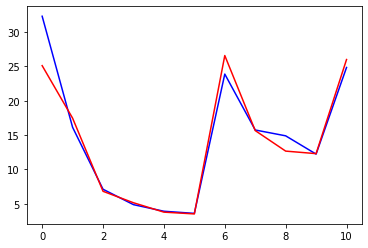

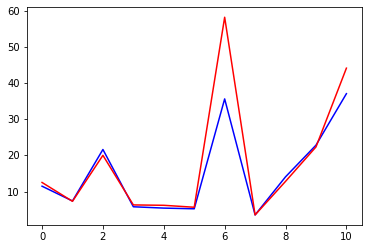

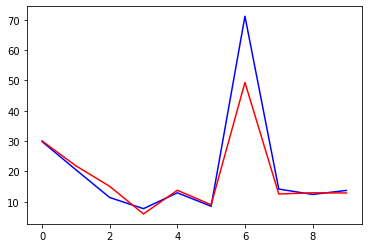

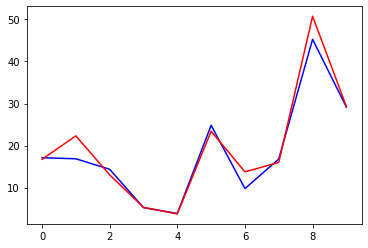

In [36]:
import xgboost as xgb
# data_dmatrix = xgb.DMatrix(data=X_train,label=Y_train)
reg_best = xgb.XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.5, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, validate_parameters=False, verbosity=1)
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
for train_index, test_index in cv.split(X):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)

    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    reg_best.fit(X_train_fold, Y_train_fold)
    Y_pred_fold = reg_best.predict(X_test_fold)
    # scores.append(best_svr.score(X_test, y_test))
    
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')
    # print('Accuracy =',accuracy_score(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMAE scores for 10 folds\n', mae_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))    
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))    

# 11. DNN_1

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               11264     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 513       
Total params: 11,777
Trainable params: 11,777
Non-trainable params: 0
_________________________________________________________________
None
KFold(n_splits=10, random_state=42, shuffle=True)
*******************Fold number************************:  1
(97, 21) (11, 21) (97,) (11,)
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 0s - loss: 249.3935 - mae: 249.3935
Epoch 2/100
 - 0s - loss: 70.1485 - mae: 70.1485
Epoch 3/100
 - 0s - loss: 85.6721 - mae: 85.6722
Epoch 4/100
 - 0s - loss: 47.1088 - mae: 47.1088
Epoch 5/100
 - 0s - loss: 48.4595 - mae: 48.4595
Epoch 6/100
 - 0s - loss: 76.6838 - mae: 76.6838
Epoch 7/100
 - 0s - loss

Epoch 42/100
 - 0s - loss: 111.8079 - mae: 111.8079
Epoch 43/100
 - 0s - loss: 69.5103 - mae: 69.5102
Epoch 44/100
 - 0s - loss: 50.1243 - mae: 50.1243
Epoch 45/100
 - 0s - loss: 104.7679 - mae: 104.7679
Epoch 46/100
 - 0s - loss: 63.5871 - mae: 63.5871
Epoch 47/100
 - 0s - loss: 71.9138 - mae: 71.9138
Epoch 48/100
 - 0s - loss: 31.6140 - mae: 31.6140
Epoch 49/100
 - 0s - loss: 31.4464 - mae: 31.4464
Epoch 50/100
 - 0s - loss: 35.3356 - mae: 35.3356
Epoch 51/100
 - 0s - loss: 33.6020 - mae: 33.6020
Epoch 52/100
 - 0s - loss: 29.1640 - mae: 29.1640
Epoch 53/100
 - 0s - loss: 32.5005 - mae: 32.5005
Epoch 54/100
 - 0s - loss: 52.1270 - mae: 52.1270
Epoch 55/100
 - 0s - loss: 43.6946 - mae: 43.6946
Epoch 56/100
 - 0s - loss: 60.3855 - mae: 60.3855
Epoch 57/100
 - 0s - loss: 73.4766 - mae: 73.4766
Epoch 58/100
 - 0s - loss: 34.2091 - mae: 34.2091
Epoch 59/100
 - 0s - loss: 21.1536 - mae: 21.1536
Epoch 60/100
 - 0s - loss: 38.4892 - mae: 38.4892
Epoch 61/100
 - 0s - loss: 20.2612 - mae: 20.2

Epoch 2/100
 - 0s - loss: 65.6938 - mae: 65.6938
Epoch 3/100
 - 0s - loss: 39.0761 - mae: 39.0761
Epoch 4/100
 - 0s - loss: 46.4218 - mae: 46.4218
Epoch 5/100
 - 0s - loss: 48.4682 - mae: 48.4682
Epoch 6/100
 - 0s - loss: 46.8320 - mae: 46.8320
Epoch 7/100
 - 0s - loss: 94.7858 - mae: 94.7858
Epoch 8/100
 - 0s - loss: 67.8394 - mae: 67.8394
Epoch 9/100
 - 0s - loss: 29.8127 - mae: 29.8127
Epoch 10/100
 - 0s - loss: 25.4186 - mae: 25.4186
Epoch 11/100
 - 0s - loss: 21.5847 - mae: 21.5847
Epoch 12/100
 - 0s - loss: 15.6388 - mae: 15.6388
Epoch 13/100
 - 0s - loss: 18.5978 - mae: 18.5978
Epoch 14/100
 - 0s - loss: 41.7969 - mae: 41.7969
Epoch 15/100
 - 0s - loss: 37.0163 - mae: 37.0163
Epoch 16/100
 - 0s - loss: 44.4080 - mae: 44.4080
Epoch 17/100
 - 0s - loss: 35.3829 - mae: 35.3829
Epoch 18/100
 - 0s - loss: 33.4527 - mae: 33.4527
Epoch 19/100
 - 0s - loss: 33.4795 - mae: 33.4795
Epoch 20/100
 - 0s - loss: 36.2811 - mae: 36.2811
Epoch 21/100
 - 0s - loss: 55.5799 - mae: 55.5799
Epoch 22

Epoch 64/100
 - 0s - loss: 12.4709 - mae: 12.4709
Epoch 65/100
 - 0s - loss: 30.6915 - mae: 30.6915
Epoch 66/100
 - 0s - loss: 32.3113 - mae: 32.3113
Epoch 67/100
 - 0s - loss: 49.0988 - mae: 49.0988
Epoch 68/100
 - 0s - loss: 41.1988 - mae: 41.1988
Epoch 69/100
 - 0s - loss: 70.1421 - mae: 70.1422
Epoch 70/100
 - 0s - loss: 74.2219 - mae: 74.2219
Epoch 71/100
 - 0s - loss: 67.1349 - mae: 67.1349
Epoch 72/100
 - 0s - loss: 27.4921 - mae: 27.4921
Epoch 73/100
 - 0s - loss: 20.8972 - mae: 20.8972
Epoch 74/100
 - 0s - loss: 26.5957 - mae: 26.5957
Epoch 75/100
 - 0s - loss: 28.0792 - mae: 28.0792
Epoch 76/100
 - 0s - loss: 37.4971 - mae: 37.4971
Epoch 77/100
 - 0s - loss: 21.5400 - mae: 21.5400
Epoch 78/100
 - 0s - loss: 26.2108 - mae: 26.2108
Epoch 79/100
 - 0s - loss: 20.4087 - mae: 20.4087
Epoch 80/100
 - 0s - loss: 32.1645 - mae: 32.1645
Epoch 81/100
 - 0s - loss: 43.6758 - mae: 43.6758
Epoch 82/100
 - 0s - loss: 104.4053 - mae: 104.4054
Epoch 83/100
 - 0s - loss: 113.5463 - mae: 113.5

Epoch 25/100
 - 0s - loss: 23.7751 - mae: 23.7751
Epoch 26/100
 - 0s - loss: 59.9528 - mae: 59.9528
Epoch 27/100
 - 0s - loss: 33.9273 - mae: 33.9273
Epoch 28/100
 - 0s - loss: 13.4402 - mae: 13.4402
Epoch 29/100
 - 0s - loss: 13.1319 - mae: 13.1319
Epoch 30/100
 - 0s - loss: 31.0810 - mae: 31.0810
Epoch 31/100
 - 0s - loss: 19.6052 - mae: 19.6052
Epoch 32/100
 - 0s - loss: 20.5184 - mae: 20.5184
Epoch 33/100
 - 0s - loss: 37.9108 - mae: 37.9108
Epoch 34/100
 - 0s - loss: 27.9742 - mae: 27.9742
Epoch 35/100
 - 0s - loss: 23.3640 - mae: 23.3640
Epoch 36/100
 - 0s - loss: 19.0503 - mae: 19.0503
Epoch 37/100
 - 0s - loss: 21.5200 - mae: 21.5200
Epoch 38/100
 - 0s - loss: 18.9907 - mae: 18.9907
Epoch 39/100
 - 0s - loss: 30.4099 - mae: 30.4099
Epoch 40/100
 - 0s - loss: 18.9877 - mae: 18.9877
Epoch 41/100
 - 0s - loss: 23.4172 - mae: 23.4172
Epoch 42/100
 - 0s - loss: 21.5065 - mae: 21.5065
Epoch 43/100
 - 0s - loss: 11.3810 - mae: 11.3810
Epoch 44/100
 - 0s - loss: 32.7961 - mae: 32.7961


Epoch 87/100
 - 0s - loss: 54.0834 - mae: 54.0834
Epoch 88/100
 - 0s - loss: 43.0047 - mae: 43.0047
Epoch 89/100
 - 0s - loss: 32.4008 - mae: 32.4007
Epoch 90/100
 - 0s - loss: 36.4863 - mae: 36.4863
Epoch 91/100
 - 0s - loss: 46.4245 - mae: 46.4245
Epoch 92/100
 - 0s - loss: 22.3384 - mae: 22.3384
Epoch 93/100
 - 0s - loss: 55.5782 - mae: 55.5782
Epoch 94/100
 - 0s - loss: 89.7302 - mae: 89.7302
Epoch 95/100
 - 0s - loss: 60.7857 - mae: 60.7857
Epoch 96/100
 - 0s - loss: 37.9234 - mae: 37.9234
Epoch 97/100
 - 0s - loss: 22.5518 - mae: 22.5518
Epoch 98/100
 - 0s - loss: 25.6632 - mae: 25.6632
Epoch 99/100
 - 0s - loss: 23.7395 - mae: 23.7395
Epoch 100/100
 - 0s - loss: 30.4208 - mae: 30.4208
*******************Fold number************************:  9
(98, 21) (10, 21) (98,) (10,)
Epoch 1/100
 - 0s - loss: 67.2887 - mae: 67.2887
Epoch 2/100
 - 0s - loss: 47.5231 - mae: 47.5231
Epoch 3/100
 - 0s - loss: 40.2204 - mae: 40.2204
Epoch 4/100
 - 0s - loss: 37.7336 - mae: 37.7336
Epoch 5/100
 -

Epoch 48/100
 - 0s - loss: 34.9334 - mae: 34.9334
Epoch 49/100
 - 0s - loss: 35.7637 - mae: 35.7637
Epoch 50/100
 - 0s - loss: 35.4815 - mae: 35.4815
Epoch 51/100
 - 0s - loss: 27.4409 - mae: 27.4409
Epoch 52/100
 - 0s - loss: 18.5852 - mae: 18.5852
Epoch 53/100
 - 0s - loss: 16.7440 - mae: 16.7440
Epoch 54/100
 - 0s - loss: 29.1911 - mae: 29.1911
Epoch 55/100
 - 0s - loss: 24.0027 - mae: 24.0027
Epoch 56/100
 - 0s - loss: 14.6594 - mae: 14.6594
Epoch 57/100
 - 0s - loss: 22.6670 - mae: 22.6670
Epoch 58/100
 - 0s - loss: 26.3308 - mae: 26.3308
Epoch 59/100
 - 0s - loss: 22.4822 - mae: 22.4822
Epoch 60/100
 - 0s - loss: 23.2906 - mae: 23.2906
Epoch 61/100
 - 0s - loss: 28.7653 - mae: 28.7653
Epoch 62/100
 - 0s - loss: 20.6999 - mae: 20.6999
Epoch 63/100
 - 0s - loss: 30.1392 - mae: 30.1392
Epoch 64/100
 - 0s - loss: 16.3179 - mae: 16.3179
Epoch 65/100
 - 0s - loss: 12.7768 - mae: 12.7768
Epoch 66/100
 - 0s - loss: 9.5689 - mae: 9.5689
Epoch 67/100
 - 0s - loss: 34.8066 - mae: 34.8066
Ep

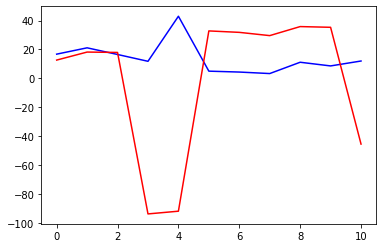

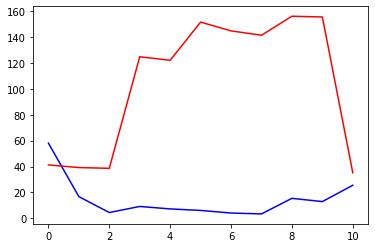

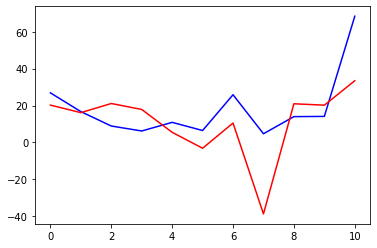

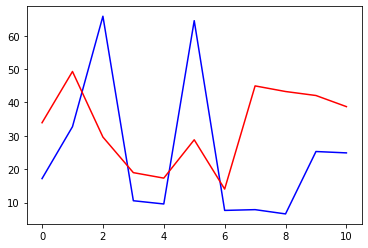

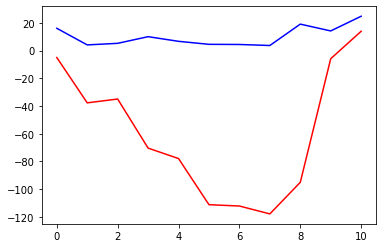

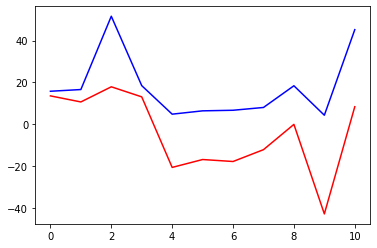

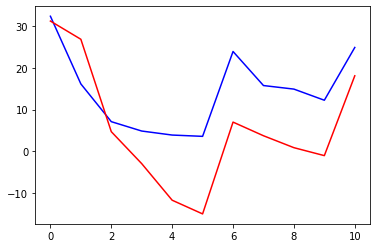

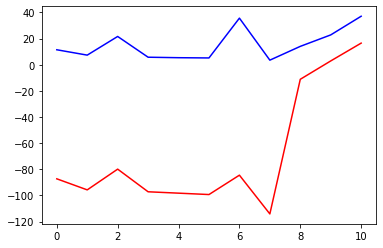

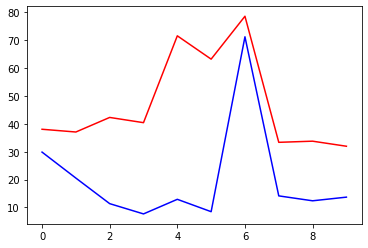

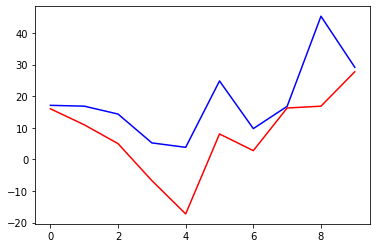

In [38]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# define the keras model
model = Sequential()
model.add(Dense(512, input_dim=21, activation='relu'))
model.add(Dense(1, activation='linear'))
print(model.summary())
# compile the keras model
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
k = 1
for train_index, test_index in cv.split(X):
    print('*******************Fold number************************: ',k)
    k = k+1    
    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    # fit the keras model on the dataset
    model.fit(X_train_fold, Y_train_fold, epochs=100, batch_size=10, verbose = 2)
    Y_pred_fold = model.predict(X_test_fold)
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')
    # print('Accuracy =',accuracy_score(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
    
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))   
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))    

# DNN_2

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               11264     
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 537,089
Trainable params: 537,089
Non-trainable params: 0
_________________________________________________________________
None
KFold(n_splits=10, random_state=42, shuffle=True)
*******************Fold number************************:  1
(97, 21) (11, 21) (97,) (11,)
Epoch 1/100
 - 1s - loss: 1011.9006 - mae: 1011.9006
Epoch 2/100
 - 0s - loss: 241.6957 - mae: 241.695

Epoch 47/100
 - 0s - loss: 8.4107 - mae: 8.4107
Epoch 48/100
 - 0s - loss: 7.7619 - mae: 7.7619
Epoch 49/100
 - 0s - loss: 15.7517 - mae: 15.7517
Epoch 50/100
 - 0s - loss: 9.0897 - mae: 9.0897
Epoch 51/100
 - 0s - loss: 10.0133 - mae: 10.0133
Epoch 52/100
 - 0s - loss: 8.6898 - mae: 8.6898
Epoch 53/100
 - 0s - loss: 8.1139 - mae: 8.1139
Epoch 54/100
 - 0s - loss: 7.9228 - mae: 7.9228
Epoch 55/100
 - 0s - loss: 7.6497 - mae: 7.6497
Epoch 56/100
 - 0s - loss: 7.5893 - mae: 7.5893
Epoch 57/100
 - 0s - loss: 7.6659 - mae: 7.6659
Epoch 58/100
 - 0s - loss: 7.5153 - mae: 7.5153
Epoch 59/100
 - 0s - loss: 7.6821 - mae: 7.6821
Epoch 60/100
 - 0s - loss: 7.7488 - mae: 7.7488
Epoch 61/100
 - 0s - loss: 7.5750 - mae: 7.5750
Epoch 62/100
 - 0s - loss: 7.7435 - mae: 7.7435
Epoch 63/100
 - 0s - loss: 7.5182 - mae: 7.5182
Epoch 64/100
 - 0s - loss: 8.2145 - mae: 8.2145
Epoch 65/100
 - 0s - loss: 8.2090 - mae: 8.2090
Epoch 66/100
 - 0s - loss: 8.0051 - mae: 8.0051
Epoch 67/100
 - 0s - loss: 8.3130 - 

Epoch 14/100
 - 0s - loss: 9.0614 - mae: 9.0614
Epoch 15/100
 - 0s - loss: 9.0600 - mae: 9.0600
Epoch 16/100
 - 0s - loss: 9.0631 - mae: 9.0631
Epoch 17/100
 - 0s - loss: 9.0609 - mae: 9.0609
Epoch 18/100
 - 0s - loss: 9.0648 - mae: 9.0648
Epoch 19/100
 - 0s - loss: 9.0624 - mae: 9.0624
Epoch 20/100
 - 0s - loss: 9.0633 - mae: 9.0633
Epoch 21/100
 - 0s - loss: 9.0629 - mae: 9.0629
Epoch 22/100
 - 0s - loss: 9.0676 - mae: 9.0676
Epoch 23/100
 - 0s - loss: 9.0627 - mae: 9.0627
Epoch 24/100
 - 0s - loss: 9.0613 - mae: 9.0613
Epoch 25/100
 - 0s - loss: 9.0606 - mae: 9.0606
Epoch 26/100
 - 0s - loss: 9.0628 - mae: 9.0628
Epoch 27/100
 - 0s - loss: 9.0616 - mae: 9.0616
Epoch 28/100
 - 0s - loss: 9.0627 - mae: 9.0627
Epoch 29/100
 - 0s - loss: 9.0610 - mae: 9.0610
Epoch 30/100
 - 0s - loss: 9.0627 - mae: 9.0627
Epoch 31/100
 - 0s - loss: 9.0610 - mae: 9.0610
Epoch 32/100
 - 0s - loss: 9.0612 - mae: 9.0612
Epoch 33/100
 - 0s - loss: 9.0618 - mae: 9.0618
Epoch 34/100
 - 0s - loss: 9.0622 - mae:

Epoch 80/100
 - 0s - loss: 10.0985 - mae: 10.0985
Epoch 81/100
 - 0s - loss: 10.0957 - mae: 10.0957
Epoch 82/100
 - 0s - loss: 10.1011 - mae: 10.1011
Epoch 83/100
 - 0s - loss: 10.0963 - mae: 10.0963
Epoch 84/100
 - 0s - loss: 10.0951 - mae: 10.0951
Epoch 85/100
 - 0s - loss: 10.0989 - mae: 10.0989
Epoch 86/100
 - 0s - loss: 10.0955 - mae: 10.0955
Epoch 87/100
 - 0s - loss: 10.0946 - mae: 10.0946
Epoch 88/100
 - 0s - loss: 10.0960 - mae: 10.0960
Epoch 89/100
 - 0s - loss: 10.0944 - mae: 10.0944
Epoch 90/100
 - 0s - loss: 10.0996 - mae: 10.0996
Epoch 91/100
 - 0s - loss: 10.0982 - mae: 10.0982
Epoch 92/100
 - 0s - loss: 10.0936 - mae: 10.0936
Epoch 93/100
 - 0s - loss: 10.0957 - mae: 10.0957
Epoch 94/100
 - 0s - loss: 10.0972 - mae: 10.0972
Epoch 95/100
 - 0s - loss: 10.0985 - mae: 10.0985
Epoch 96/100
 - 0s - loss: 10.0959 - mae: 10.0959
Epoch 97/100
 - 0s - loss: 10.0976 - mae: 10.0976
Epoch 98/100
 - 0s - loss: 10.0962 - mae: 10.0962
Epoch 99/100
 - 0s - loss: 10.0969 - mae: 10.0969


Epoch 45/100
 - 0s - loss: 10.0133 - mae: 10.0133
Epoch 46/100
 - 0s - loss: 10.0126 - mae: 10.0126
Epoch 47/100
 - 0s - loss: 10.0133 - mae: 10.0133
Epoch 48/100
 - 0s - loss: 10.0124 - mae: 10.0124
Epoch 49/100
 - 0s - loss: 10.0136 - mae: 10.0136
Epoch 50/100
 - 0s - loss: 10.0133 - mae: 10.0133
Epoch 51/100
 - 0s - loss: 10.0160 - mae: 10.0160
Epoch 52/100
 - 0s - loss: 10.0122 - mae: 10.0122
Epoch 53/100
 - 0s - loss: 10.0118 - mae: 10.0118
Epoch 54/100
 - 0s - loss: 10.0120 - mae: 10.0120
Epoch 55/100
 - 0s - loss: 10.0159 - mae: 10.0159
Epoch 56/100
 - 0s - loss: 10.0146 - mae: 10.0146
Epoch 57/100
 - 0s - loss: 10.0116 - mae: 10.0116
Epoch 58/100
 - 0s - loss: 10.0153 - mae: 10.0153
Epoch 59/100
 - 0s - loss: 10.0129 - mae: 10.0129
Epoch 60/100
 - 0s - loss: 10.0105 - mae: 10.0105
Epoch 61/100
 - 0s - loss: 10.0140 - mae: 10.0140
Epoch 62/100
 - 0s - loss: 10.0116 - mae: 10.0116
Epoch 63/100
 - 0s - loss: 10.0126 - mae: 10.0126
Epoch 64/100
 - 0s - loss: 10.0110 - mae: 10.0110


Epoch 10/100
 - 0s - loss: 9.7736 - mae: 9.7736
Epoch 11/100
 - 0s - loss: 9.7850 - mae: 9.7850
Epoch 12/100
 - 0s - loss: 9.7760 - mae: 9.7760
Epoch 13/100
 - 0s - loss: 9.7754 - mae: 9.7754
Epoch 14/100
 - 0s - loss: 9.7734 - mae: 9.7734
Epoch 15/100
 - 0s - loss: 9.7764 - mae: 9.7764
Epoch 16/100
 - 0s - loss: 9.7756 - mae: 9.7756
Epoch 17/100
 - 0s - loss: 9.7737 - mae: 9.7737
Epoch 18/100
 - 0s - loss: 9.7770 - mae: 9.7770
Epoch 19/100
 - 0s - loss: 9.7729 - mae: 9.7729
Epoch 20/100
 - 0s - loss: 9.7776 - mae: 9.7776
Epoch 21/100
 - 0s - loss: 9.7727 - mae: 9.7727
Epoch 22/100
 - 0s - loss: 9.7727 - mae: 9.7727
Epoch 23/100
 - 0s - loss: 9.7768 - mae: 9.7768
Epoch 24/100
 - 0s - loss: 9.7748 - mae: 9.7748
Epoch 25/100
 - 0s - loss: 9.7838 - mae: 9.7838
Epoch 26/100
 - 0s - loss: 9.7809 - mae: 9.7809
Epoch 27/100
 - 0s - loss: 9.7894 - mae: 9.7894
Epoch 28/100
 - 0s - loss: 9.7761 - mae: 9.7761
Epoch 29/100
 - 0s - loss: 9.7785 - mae: 9.7785
Epoch 30/100
 - 0s - loss: 9.7758 - mae:

Epoch 79/100
 - 0s - loss: 9.7919 - mae: 9.7919
Epoch 80/100
 - 0s - loss: 9.7928 - mae: 9.7928
Epoch 81/100
 - 0s - loss: 9.8101 - mae: 9.8101
Epoch 82/100
 - 0s - loss: 9.8123 - mae: 9.8123
Epoch 83/100
 - 0s - loss: 9.7906 - mae: 9.7906
Epoch 84/100
 - 0s - loss: 9.7934 - mae: 9.7934
Epoch 85/100
 - 0s - loss: 9.7930 - mae: 9.7930
Epoch 86/100
 - 0s - loss: 9.7919 - mae: 9.7919
Epoch 87/100
 - 0s - loss: 9.7934 - mae: 9.7934
Epoch 88/100
 - 0s - loss: 9.7893 - mae: 9.7893
Epoch 89/100
 - 0s - loss: 9.7957 - mae: 9.7957
Epoch 90/100
 - 0s - loss: 9.7956 - mae: 9.7956
Epoch 91/100
 - 0s - loss: 9.7891 - mae: 9.7891
Epoch 92/100
 - 0s - loss: 9.7917 - mae: 9.7917
Epoch 93/100
 - 0s - loss: 9.7997 - mae: 9.7997
Epoch 94/100
 - 0s - loss: 9.7914 - mae: 9.7914
Epoch 95/100
 - 0s - loss: 9.7924 - mae: 9.7924
Epoch 96/100
 - 0s - loss: 9.7944 - mae: 9.7944
Epoch 97/100
 - 0s - loss: 9.7898 - mae: 9.7898
Epoch 98/100
 - 0s - loss: 9.8026 - mae: 9.8026
Epoch 99/100
 - 0s - loss: 9.7944 - mae:

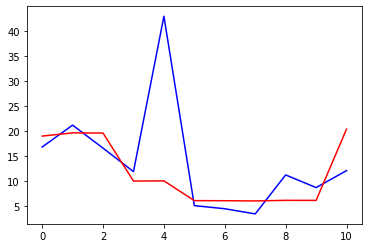

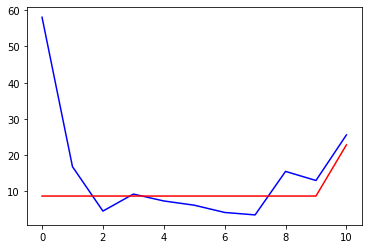

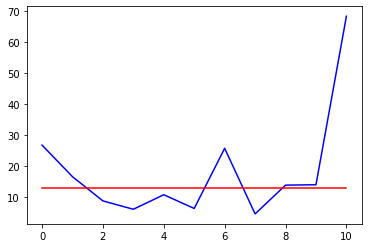

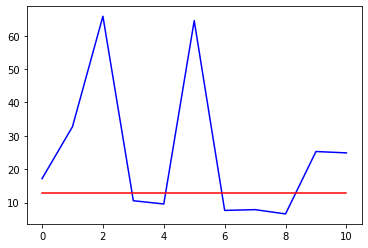

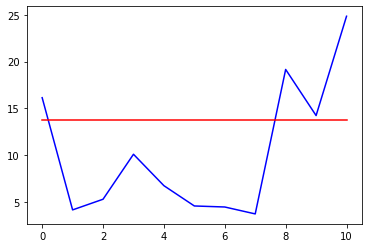

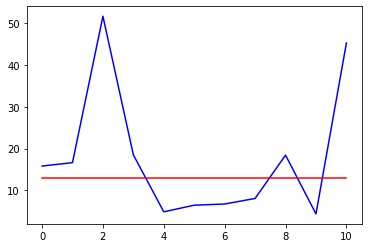

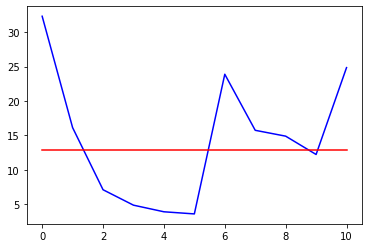

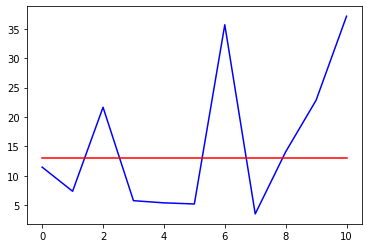

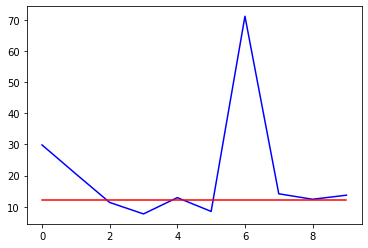

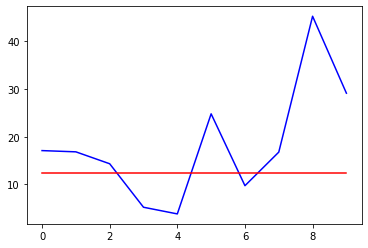

In [39]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# define the keras model
model = Sequential()
model.add(Dense(512, input_dim=21, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='linear'))
print(model.summary())
# compile the keras model
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
k = 1 
for train_index, test_index in (cv.split(X)):
    print('*******************Fold number************************: ',k)
    k = k+1    
    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    # fit the keras model on the dataset
    model.fit(X_train_fold, Y_train_fold, epochs=100, batch_size=10, verbose = 2)
    Y_pred_fold = model.predict(X_test_fold)
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
    
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))   
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))    

# DNN_3

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               5632      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_11 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 5         
Total params: 23,193
Trainable params: 23,193
Non-trainable params: 0
_________________________________________________________________
None
KFold(n_splits=10, random_state=42, shuffle=True)
*******************Fold number************************:  1
(9

Epoch 40/100
 - 0s - loss: 15.6874 - mae: 15.6874
Epoch 41/100
 - 0s - loss: 15.6774 - mae: 15.6774
Epoch 42/100
 - 0s - loss: 15.6674 - mae: 15.6674
Epoch 43/100
 - 0s - loss: 15.6574 - mae: 15.6574
Epoch 44/100
 - 0s - loss: 15.6474 - mae: 15.6474
Epoch 45/100
 - 0s - loss: 15.6374 - mae: 15.6374
Epoch 46/100
 - 0s - loss: 15.6274 - mae: 15.6274
Epoch 47/100
 - 0s - loss: 15.6174 - mae: 15.6174
Epoch 48/100
 - 0s - loss: 15.6074 - mae: 15.6074
Epoch 49/100
 - 0s - loss: 15.5974 - mae: 15.5974
Epoch 50/100
 - 0s - loss: 15.5874 - mae: 15.5874
Epoch 51/100
 - 0s - loss: 15.5774 - mae: 15.5774
Epoch 52/100
 - 0s - loss: 15.5673 - mae: 15.5673
Epoch 53/100
 - 0s - loss: 15.5573 - mae: 15.5573
Epoch 54/100
 - 0s - loss: 15.5473 - mae: 15.5473
Epoch 55/100
 - 0s - loss: 15.5373 - mae: 15.5373
Epoch 56/100
 - 0s - loss: 15.5273 - mae: 15.5273
Epoch 57/100
 - 0s - loss: 15.5173 - mae: 15.5173
Epoch 58/100
 - 0s - loss: 15.5073 - mae: 15.5073
Epoch 59/100
 - 0s - loss: 15.4973 - mae: 15.4973


(97, 21) (11, 21) (97,) (11,)
Epoch 1/100
 - 0s - loss: 12.9493 - mae: 12.9493
Epoch 2/100
 - 0s - loss: 12.9393 - mae: 12.9393
Epoch 3/100
 - 0s - loss: 12.9293 - mae: 12.9293
Epoch 4/100
 - 0s - loss: 12.9193 - mae: 12.9193
Epoch 5/100
 - 0s - loss: 12.9093 - mae: 12.9093
Epoch 6/100
 - 0s - loss: 12.8993 - mae: 12.8993
Epoch 7/100
 - 0s - loss: 12.8893 - mae: 12.8893
Epoch 8/100
 - 0s - loss: 12.8793 - mae: 12.8793
Epoch 9/100
 - 0s - loss: 12.8693 - mae: 12.8693
Epoch 10/100
 - 0s - loss: 12.8593 - mae: 12.8593
Epoch 11/100
 - 0s - loss: 12.8493 - mae: 12.8493
Epoch 12/100
 - 0s - loss: 12.8393 - mae: 12.8393
Epoch 13/100
 - 0s - loss: 12.8293 - mae: 12.8293
Epoch 14/100
 - 0s - loss: 12.8193 - mae: 12.8193
Epoch 15/100
 - 0s - loss: 12.8093 - mae: 12.8093
Epoch 16/100
 - 0s - loss: 12.7992 - mae: 12.7992
Epoch 17/100
 - 0s - loss: 12.7892 - mae: 12.7892
Epoch 18/100
 - 0s - loss: 12.7792 - mae: 12.7792
Epoch 19/100
 - 0s - loss: 12.7692 - mae: 12.7692
Epoch 20/100
 - 0s - loss: 12

Epoch 63/100
 - 0s - loss: 13.1965 - mae: 13.1965
Epoch 64/100
 - 0s - loss: 13.1898 - mae: 13.1898
Epoch 65/100
 - 0s - loss: 13.1828 - mae: 13.1828
Epoch 66/100
 - 0s - loss: 13.1758 - mae: 13.1758
Epoch 67/100
 - 0s - loss: 13.1690 - mae: 13.1690
Epoch 68/100
 - 0s - loss: 13.1620 - mae: 13.1620
Epoch 69/100
 - 0s - loss: 13.1550 - mae: 13.1550
Epoch 70/100
 - 0s - loss: 13.1484 - mae: 13.1484
Epoch 71/100
 - 0s - loss: 13.1413 - mae: 13.1413
Epoch 72/100
 - 0s - loss: 13.1342 - mae: 13.1342
Epoch 73/100
 - 0s - loss: 13.1273 - mae: 13.1273
Epoch 74/100
 - 0s - loss: 13.1204 - mae: 13.1204
Epoch 75/100
 - 0s - loss: 13.1133 - mae: 13.1133
Epoch 76/100
 - 0s - loss: 13.1064 - mae: 13.1064
Epoch 77/100
 - 0s - loss: 13.0995 - mae: 13.0995
Epoch 78/100
 - 0s - loss: 13.0925 - mae: 13.0925
Epoch 79/100
 - 0s - loss: 13.0855 - mae: 13.0855
Epoch 80/100
 - 0s - loss: 13.0784 - mae: 13.0784
Epoch 81/100
 - 0s - loss: 13.0716 - mae: 13.0716
Epoch 82/100
 - 0s - loss: 13.0644 - mae: 13.0644


Epoch 24/100
 - 0s - loss: 11.8383 - mae: 11.8383
Epoch 25/100
 - 0s - loss: 11.8337 - mae: 11.8337
Epoch 26/100
 - 0s - loss: 11.8287 - mae: 11.8287
Epoch 27/100
 - 0s - loss: 11.8242 - mae: 11.8242
Epoch 28/100
 - 0s - loss: 11.8194 - mae: 11.8194
Epoch 29/100
 - 0s - loss: 11.8147 - mae: 11.8147
Epoch 30/100
 - 0s - loss: 11.8099 - mae: 11.8099
Epoch 31/100
 - 0s - loss: 11.8053 - mae: 11.8053
Epoch 32/100
 - 0s - loss: 11.8006 - mae: 11.8006
Epoch 33/100
 - 0s - loss: 11.7956 - mae: 11.7956
Epoch 34/100
 - 0s - loss: 11.7909 - mae: 11.7909
Epoch 35/100
 - 0s - loss: 11.7863 - mae: 11.7863
Epoch 36/100
 - 0s - loss: 11.7813 - mae: 11.7813
Epoch 37/100
 - 0s - loss: 11.7767 - mae: 11.7767
Epoch 38/100
 - 0s - loss: 11.7722 - mae: 11.7723
Epoch 39/100
 - 0s - loss: 11.7673 - mae: 11.7673
Epoch 40/100
 - 0s - loss: 11.7626 - mae: 11.7626
Epoch 41/100
 - 0s - loss: 11.7576 - mae: 11.7576
Epoch 42/100
 - 0s - loss: 11.7530 - mae: 11.7530
Epoch 43/100
 - 0s - loss: 11.7482 - mae: 11.7482


Epoch 86/100
 - 0s - loss: 11.0809 - mae: 11.0809
Epoch 87/100
 - 0s - loss: 11.0773 - mae: 11.0773
Epoch 88/100
 - 0s - loss: 11.0738 - mae: 11.0738
Epoch 89/100
 - 0s - loss: 11.0704 - mae: 11.0704
Epoch 90/100
 - 0s - loss: 11.0667 - mae: 11.0667
Epoch 91/100
 - 0s - loss: 11.0634 - mae: 11.0634
Epoch 92/100
 - 0s - loss: 11.0597 - mae: 11.0597
Epoch 93/100
 - 0s - loss: 11.0564 - mae: 11.0564
Epoch 94/100
 - 0s - loss: 11.0530 - mae: 11.0530
Epoch 95/100
 - 0s - loss: 11.0498 - mae: 11.0498
Epoch 96/100
 - 0s - loss: 11.0465 - mae: 11.0465
Epoch 97/100
 - 0s - loss: 11.0432 - mae: 11.0432
Epoch 98/100
 - 0s - loss: 11.0400 - mae: 11.0400
Epoch 99/100
 - 0s - loss: 11.0369 - mae: 11.0369
Epoch 100/100
 - 0s - loss: 11.0334 - mae: 11.0334
*******************Fold number************************:  9
(98, 21) (10, 21) (98,) (10,)
Epoch 1/100
 - 0s - loss: 10.6960 - mae: 10.6960
Epoch 2/100
 - 0s - loss: 10.6936 - mae: 10.6936
Epoch 3/100
 - 0s - loss: 10.6913 - mae: 10.6913
Epoch 4/100
 

Epoch 47/100
 - 0s - loss: 10.4679 - mae: 10.4679
Epoch 48/100
 - 0s - loss: 10.4663 - mae: 10.4663
Epoch 49/100
 - 0s - loss: 10.4645 - mae: 10.4645
Epoch 50/100
 - 0s - loss: 10.4628 - mae: 10.4628
Epoch 51/100
 - 0s - loss: 10.4612 - mae: 10.4612
Epoch 52/100
 - 0s - loss: 10.4593 - mae: 10.4593
Epoch 53/100
 - 0s - loss: 10.4575 - mae: 10.4575
Epoch 54/100
 - 0s - loss: 10.4558 - mae: 10.4558
Epoch 55/100
 - 0s - loss: 10.4540 - mae: 10.4540
Epoch 56/100
 - 0s - loss: 10.4523 - mae: 10.4523
Epoch 57/100
 - 0s - loss: 10.4505 - mae: 10.4505
Epoch 58/100
 - 0s - loss: 10.4488 - mae: 10.4488
Epoch 59/100
 - 0s - loss: 10.4470 - mae: 10.4470
Epoch 60/100
 - 0s - loss: 10.4453 - mae: 10.4452
Epoch 61/100
 - 0s - loss: 10.4437 - mae: 10.4437
Epoch 62/100
 - 0s - loss: 10.4417 - mae: 10.4417
Epoch 63/100
 - 0s - loss: 10.4403 - mae: 10.4403
Epoch 64/100
 - 0s - loss: 10.4381 - mae: 10.4381
Epoch 65/100
 - 0s - loss: 10.4364 - mae: 10.4364
Epoch 66/100
 - 0s - loss: 10.4347 - mae: 10.4347


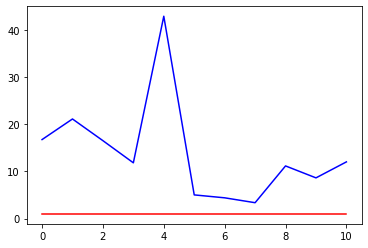

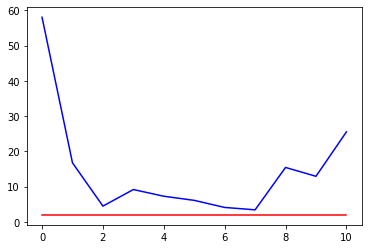

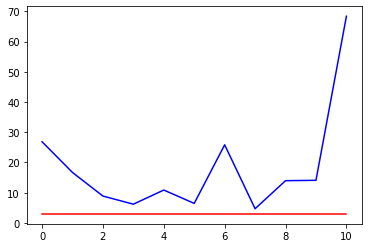

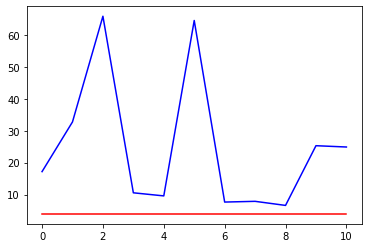

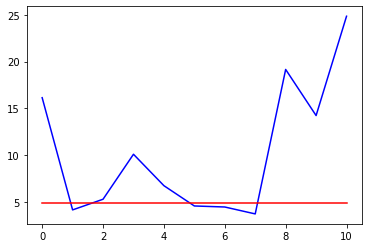

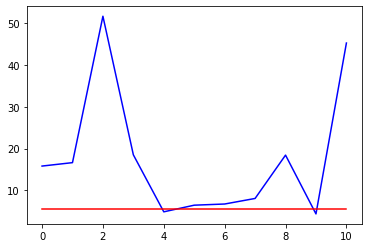

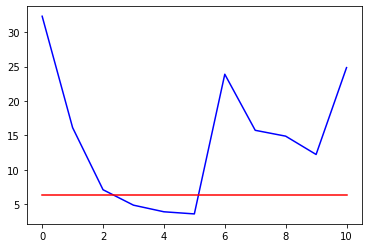

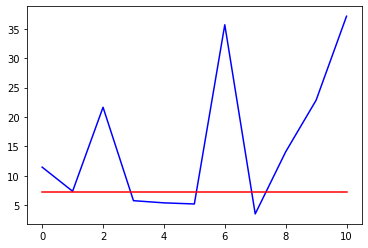

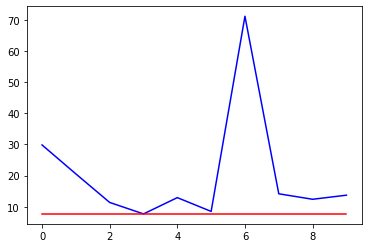

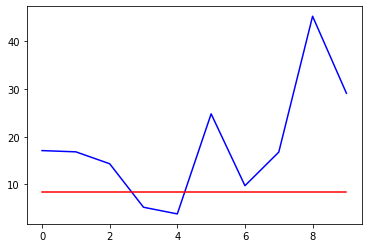

In [40]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# define the keras model
model = Sequential()
model.add(Dense(256, input_dim=21, activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense(16,  activation='relu'))
model.add(Dense(4,  activation='relu'))
model.add(Dense(1, activation='linear'))
print(model.summary())
# compile the keras model
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
k = 1
for train_index, test_index in (cv.split(X)):
    print('*******************Fold number************************: ',k)
    k = k+1
    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    # fit the keras model on the dataset
    model.fit(X_train_fold, Y_train_fold, epochs=100, batch_size=10, verbose = 2)
    Y_pred_fold = model.predict(X_test_fold)
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores)) 
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores)) 

# DNN_4

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               11264     
_________________________________________________________________
dense_15 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_16 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 18        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 3         
Total params: 81,341
Trainable params: 81,341
Non-trainable params: 0
__________________________________________________

Epoch 38/100
 - 0s - loss: 15.6837 - mae: 15.6837
Epoch 39/100
 - 0s - loss: 15.6737 - mae: 15.6737
Epoch 40/100
 - 0s - loss: 15.6637 - mae: 15.6637
Epoch 41/100
 - 0s - loss: 15.6537 - mae: 15.6537
Epoch 42/100
 - 0s - loss: 15.6437 - mae: 15.6437
Epoch 43/100
 - 0s - loss: 15.6337 - mae: 15.6337
Epoch 44/100
 - 0s - loss: 15.6237 - mae: 15.6237
Epoch 45/100
 - 0s - loss: 15.6137 - mae: 15.6137
Epoch 46/100
 - 0s - loss: 15.6037 - mae: 15.6037
Epoch 47/100
 - 0s - loss: 15.5937 - mae: 15.5937
Epoch 48/100
 - 0s - loss: 15.5837 - mae: 15.5837
Epoch 49/100
 - 0s - loss: 15.5737 - mae: 15.5737
Epoch 50/100
 - 0s - loss: 15.5637 - mae: 15.5637
Epoch 51/100
 - 0s - loss: 15.5537 - mae: 15.5537
Epoch 52/100
 - 0s - loss: 15.5437 - mae: 15.5437
Epoch 53/100
 - 0s - loss: 15.5337 - mae: 15.5337
Epoch 54/100
 - 0s - loss: 15.5237 - mae: 15.5237
Epoch 55/100
 - 0s - loss: 15.5137 - mae: 15.5137
Epoch 56/100
 - 0s - loss: 15.5037 - mae: 15.5037
Epoch 57/100
 - 0s - loss: 15.4937 - mae: 15.4937


Epoch 100/100
 - 0s - loss: 13.6544 - mae: 13.6544
*******************Fold number************************:  4
(97, 21) (11, 21) (97,) (11,)
Epoch 1/100
 - 0s - loss: 12.9261 - mae: 12.9261
Epoch 2/100
 - 0s - loss: 12.9161 - mae: 12.9161
Epoch 3/100
 - 0s - loss: 12.9061 - mae: 12.9061
Epoch 4/100
 - 0s - loss: 12.8961 - mae: 12.8961
Epoch 5/100
 - 0s - loss: 12.8861 - mae: 12.8861
Epoch 6/100
 - 0s - loss: 12.8761 - mae: 12.8761
Epoch 7/100
 - 0s - loss: 12.8661 - mae: 12.8661
Epoch 8/100
 - 0s - loss: 12.8561 - mae: 12.8561
Epoch 9/100
 - 0s - loss: 12.8461 - mae: 12.8461
Epoch 10/100
 - 0s - loss: 12.8361 - mae: 12.8361
Epoch 11/100
 - 0s - loss: 12.8261 - mae: 12.8261
Epoch 12/100
 - 0s - loss: 12.8161 - mae: 12.8161
Epoch 13/100
 - 0s - loss: 12.8061 - mae: 12.8061
Epoch 14/100
 - 0s - loss: 12.7961 - mae: 12.7961
Epoch 15/100
 - 0s - loss: 12.7861 - mae: 12.7861
Epoch 16/100
 - 0s - loss: 12.7761 - mae: 12.7761
Epoch 17/100
 - 0s - loss: 12.7661 - mae: 12.7661
Epoch 18/100
 - 0s 

Epoch 61/100
 - 0s - loss: 13.1953 - mae: 13.1953
Epoch 62/100
 - 0s - loss: 13.1886 - mae: 13.1886
Epoch 63/100
 - 0s - loss: 13.1815 - mae: 13.1815
Epoch 64/100
 - 0s - loss: 13.1749 - mae: 13.1749
Epoch 65/100
 - 0s - loss: 13.1676 - mae: 13.1676
Epoch 66/100
 - 0s - loss: 13.1610 - mae: 13.1610
Epoch 67/100
 - 0s - loss: 13.1539 - mae: 13.1539
Epoch 68/100
 - 0s - loss: 13.1471 - mae: 13.1471
Epoch 69/100
 - 0s - loss: 13.1402 - mae: 13.1402
Epoch 70/100
 - 0s - loss: 13.1331 - mae: 13.1331
Epoch 71/100
 - 0s - loss: 13.1262 - mae: 13.1262
Epoch 72/100
 - 0s - loss: 13.1195 - mae: 13.1195
Epoch 73/100
 - 0s - loss: 13.1125 - mae: 13.1125
Epoch 74/100
 - 0s - loss: 13.1052 - mae: 13.1052
Epoch 75/100
 - 0s - loss: 13.0986 - mae: 13.0986
Epoch 76/100
 - 0s - loss: 13.0916 - mae: 13.0916
Epoch 77/100
 - 0s - loss: 13.0846 - mae: 13.0846
Epoch 78/100
 - 0s - loss: 13.0776 - mae: 13.0776
Epoch 79/100
 - 0s - loss: 13.0705 - mae: 13.0705
Epoch 80/100
 - 0s - loss: 13.0636 - mae: 13.0636


Epoch 22/100
 - 0s - loss: 11.8378 - mae: 11.8378
Epoch 23/100
 - 0s - loss: 11.8333 - mae: 11.8333
Epoch 24/100
 - 0s - loss: 11.8283 - mae: 11.8283
Epoch 25/100
 - 0s - loss: 11.8237 - mae: 11.8237
Epoch 26/100
 - 0s - loss: 11.8191 - mae: 11.8191
Epoch 27/100
 - 0s - loss: 11.8142 - mae: 11.8142
Epoch 28/100
 - 0s - loss: 11.8095 - mae: 11.8095
Epoch 29/100
 - 0s - loss: 11.8050 - mae: 11.8050
Epoch 30/100
 - 0s - loss: 11.7999 - mae: 11.7999
Epoch 31/100
 - 0s - loss: 11.7953 - mae: 11.7953
Epoch 32/100
 - 0s - loss: 11.7904 - mae: 11.7904
Epoch 33/100
 - 0s - loss: 11.7859 - mae: 11.7859
Epoch 34/100
 - 0s - loss: 11.7812 - mae: 11.7812
Epoch 35/100
 - 0s - loss: 11.7761 - mae: 11.7761
Epoch 36/100
 - 0s - loss: 11.7716 - mae: 11.7716
Epoch 37/100
 - 0s - loss: 11.7666 - mae: 11.7666
Epoch 38/100
 - 0s - loss: 11.7619 - mae: 11.7619
Epoch 39/100
 - 0s - loss: 11.7572 - mae: 11.7572
Epoch 40/100
 - 0s - loss: 11.7524 - mae: 11.7524
Epoch 41/100
 - 0s - loss: 11.7477 - mae: 11.7477


Epoch 84/100
 - 0s - loss: 11.0789 - mae: 11.0789
Epoch 85/100
 - 0s - loss: 11.0752 - mae: 11.0752
Epoch 86/100
 - 0s - loss: 11.0720 - mae: 11.0720
Epoch 87/100
 - 0s - loss: 11.0683 - mae: 11.0683
Epoch 88/100
 - 0s - loss: 11.0649 - mae: 11.0649
Epoch 89/100
 - 0s - loss: 11.0615 - mae: 11.0615
Epoch 90/100
 - 0s - loss: 11.0579 - mae: 11.0579
Epoch 91/100
 - 0s - loss: 11.0548 - mae: 11.0548
Epoch 92/100
 - 0s - loss: 11.0514 - mae: 11.0514
Epoch 93/100
 - 0s - loss: 11.0478 - mae: 11.0478
Epoch 94/100
 - 0s - loss: 11.0448 - mae: 11.0448
Epoch 95/100
 - 0s - loss: 11.0416 - mae: 11.0416
Epoch 96/100
 - 0s - loss: 11.0386 - mae: 11.0386
Epoch 97/100
 - 0s - loss: 11.0347 - mae: 11.0347
Epoch 98/100
 - 0s - loss: 11.0317 - mae: 11.0317
Epoch 99/100
 - 0s - loss: 11.0283 - mae: 11.0283
Epoch 100/100
 - 0s - loss: 11.0249 - mae: 11.0249
*******************Fold number************************:  9
(98, 21) (10, 21) (98,) (10,)
Epoch 1/100
 - 0s - loss: 10.6891 - mae: 10.6891
Epoch 2/100

Epoch 45/100
 - 0s - loss: 10.4679 - mae: 10.4679
Epoch 46/100
 - 0s - loss: 10.4664 - mae: 10.4664
Epoch 47/100
 - 0s - loss: 10.4641 - mae: 10.4641
Epoch 48/100
 - 0s - loss: 10.4625 - mae: 10.4625
Epoch 49/100
 - 0s - loss: 10.4608 - mae: 10.4608
Epoch 50/100
 - 0s - loss: 10.4591 - mae: 10.4591
Epoch 51/100
 - 0s - loss: 10.4574 - mae: 10.4574
Epoch 52/100
 - 0s - loss: 10.4557 - mae: 10.4557
Epoch 53/100
 - 0s - loss: 10.4540 - mae: 10.4540
Epoch 54/100
 - 0s - loss: 10.4520 - mae: 10.4520
Epoch 55/100
 - 0s - loss: 10.4501 - mae: 10.4501
Epoch 56/100
 - 0s - loss: 10.4486 - mae: 10.4486
Epoch 57/100
 - 0s - loss: 10.4468 - mae: 10.4468
Epoch 58/100
 - 0s - loss: 10.4449 - mae: 10.4449
Epoch 59/100
 - 0s - loss: 10.4433 - mae: 10.4433
Epoch 60/100
 - 0s - loss: 10.4414 - mae: 10.4414
Epoch 61/100
 - 0s - loss: 10.4397 - mae: 10.4397
Epoch 62/100
 - 0s - loss: 10.4379 - mae: 10.4379
Epoch 63/100
 - 0s - loss: 10.4362 - mae: 10.4362
Epoch 64/100
 - 0s - loss: 10.4344 - mae: 10.4344


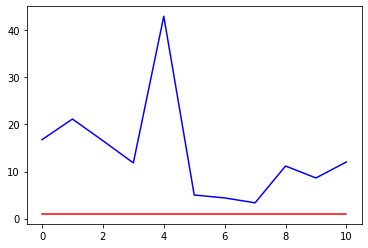

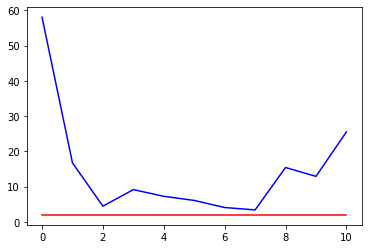

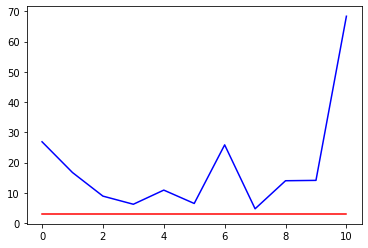

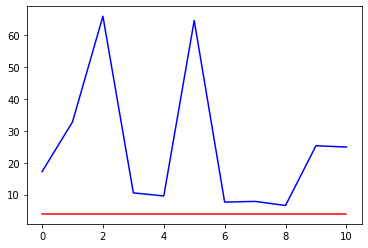

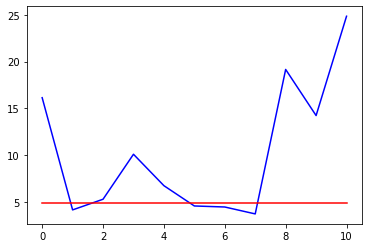

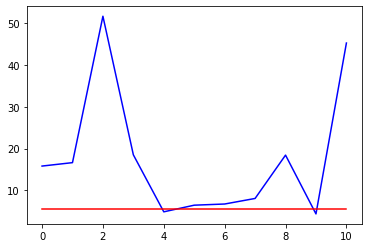

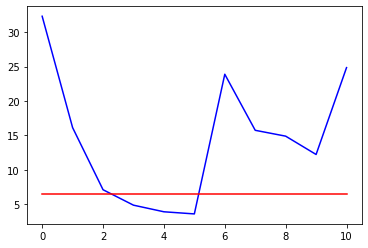

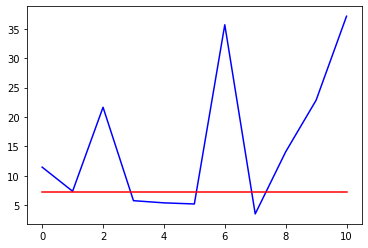

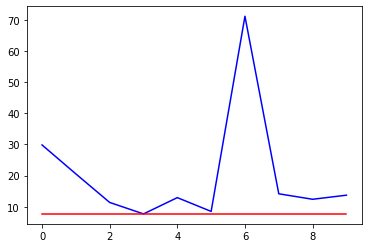

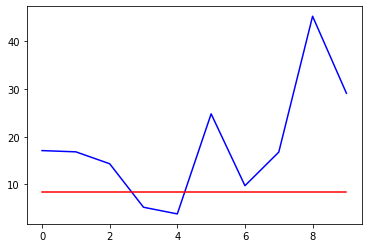

In [41]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# define the keras model
model = Sequential()
model.add(Dense(512, input_dim=21, activation='relu'))
model.add(Dense(128,  activation='relu'))
model.add(Dense(32,  activation='relu'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(2,  activation='relu'))
model.add(Dense(1, activation='linear'))
print(model.summary())
# compile the keras model
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
k = 1
for train_index, test_index in (cv.split(X)):
    print('*******************Fold number************************: ',k)
    k = k+1
    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    # fit the keras model on the dataset
    model.fit(X_train_fold, Y_train_fold, epochs=100, batch_size=10, verbose = 2)
    Y_pred_fold = model.predict(X_test_fold)
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores)) 
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores)) 